In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


#Load data
df = pd.read_csv('/content/forestfires.csv')
df.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0   

   daymon  ...  monthapr  monthaug  monthdec  monthfeb  monthjan  monthjul  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  size_category  
0         0         1         0         0         0         0          small  
1         0         0         0         0         1         0          small  
2         0         0         0         0         1         0          small  
3         0         1         0         0         0         0          small  
4         0         1         0         0         0         0          small  

[5 rows x 31 columns]

In [124]:
df.shape

(517, 31)

In [125]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [126]:
pd.set_option("display.max_columns", 31)
df.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0   

   daymon  daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  \
0       0       0       0       0       0       0         0         0   
1       0       0       0       0       1       0         0         0   
2       0       1       0       0       0       0         0         0   
3       0       0       0       0       0       0         0         0   
4       0       0       1       0       0       0         0         0   

   monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0         0         0         0         0         0         1         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         1         0   
4         0         0         0         0         0         1         0   

   monthnov  monthoct  monthsep size_category  
0         0         0         0         small  
1         0         1         0         small  
2         0         1         0         small  
3         0         0         0         small  
4         0         0         0         small

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

**EDA & Feature Engineering**

In [128]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [129]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
df[numerical_features].head()

Number of numerical variables: 28


FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  daymon  daysat  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1       0       0   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0       0       0   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0       0       1   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1       0       0   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0       0       0   

   daysun  daythu  daytue  daywed  monthapr  monthaug  monthdec  monthfeb  \
0       0       0       0       0         0         0         0         0   
1       0       0       1       0         0         0         0         0   
2       0       0       0       0         0         0         0         0   
3       0       0       0       0         0         0         0         0   
4       1       0       0       0         0         0         0         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  
0         0  
1         0  
2         0  
3         0  
4         0

In [130]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 21


<Axes: >

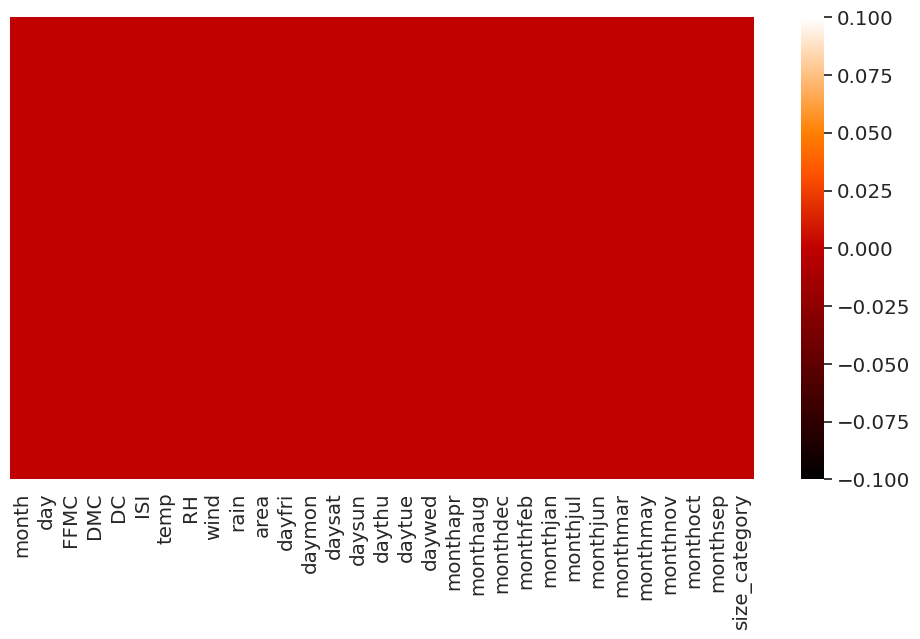

In [131]:
plt.rcParams['figure.figsize']=(12,6)
sns.heatmap(df.isna(), cmap =('gist_heat'), yticklabels=False)

In [132]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [133]:

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['month', 'day', 'size_category']


In [134]:
for var in categorical:

    print(df[var].value_counts())

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
small    378
large    139
Name: size_category, dtype: int64


In [135]:

for var in categorical:

    print(df[var].value_counts()/np.float(len(df)))

aug    0.355899
sep    0.332689
mar    0.104449
jul    0.061896
feb    0.038685
jun    0.032882
oct    0.029014
apr    0.017408
dec    0.017408
jan    0.003868
may    0.003868
nov    0.001934
Name: month, dtype: float64
sun    0.183752
fri    0.164410
sat    0.162476
mon    0.143133
tue    0.123791
thu    0.117988
wed    0.104449
Name: day, dtype: float64
small    0.731141
large    0.268859
Name: size_category, dtype: float64


In [136]:

for var in categorical:

    print(var, ' contains ', len(df[var].unique()), ' labels')

month  contains  12  labels
day  contains  7  labels
size_category  contains  2  labels


In [137]:
df.corr()

FFMC       DMC        DC       ISI      temp        RH  \
FFMC      1.000000  0.382619  0.330512  0.531805  0.431532 -0.300995   
DMC       0.382619  1.000000  0.682192  0.305128  0.469594  0.073795   
DC        0.330512  0.682192  1.000000  0.229154  0.496208 -0.039192   
ISI       0.531805  0.305128  0.229154  1.000000  0.394287 -0.132517   
temp      0.431532  0.469594  0.496208  0.394287  1.000000 -0.527390   
RH       -0.300995  0.073795 -0.039192 -0.132517 -0.527390  1.000000   
wind     -0.028485 -0.105342 -0.203466  0.106826 -0.227116  0.069410   
rain      0.056702  0.074790  0.035861  0.067668  0.069491  0.099751   
area      0.040122  0.072994  0.049383  0.008258  0.097844 -0.075519   
dayfri    0.019306 -0.012010 -0.004220  0.046695 -0.071949  0.064506   
daymon   -0.059396 -0.107921 -0.052993 -0.158601 -0.136529  0.009376   
daysat   -0.019637 -0.003653 -0.035189 -0.038585  0.034899 -0.023869   
daysun   -0.089517  0.025355 -0.001431 -0.003243  0.014403  0.136220   
daythu    0.071730  0.087672  0.051859 -0.022406  0.051432 -0.123061   
daytue    0.011225  0.000016  0.028368  0.068610  0.035630 -0.014211   
daywed    0.093908  0.017939  0.024803  0.125415  0.090580 -0.087508   
monthapr -0.117199 -0.197543 -0.268211 -0.106478 -0.157051  0.021235   
monthaug  0.228103  0.497928  0.279361  0.334639  0.351404  0.054761   
monthdec -0.137044 -0.176301 -0.105642 -0.162322 -0.329648 -0.047714   
monthfeb -0.281535 -0.317899 -0.399277 -0.249777 -0.320015  0.140430   
monthjan -0.454771 -0.105647 -0.115064 -0.103588 -0.146520  0.170923   
monthjul  0.031833 -0.001946 -0.100887  0.020982  0.142588  0.013185   
monthjun -0.040634 -0.050403 -0.186183  0.111516  0.051015  0.009382   
monthmar -0.074327 -0.407404 -0.650427 -0.143520 -0.341797 -0.089836   
monthmay -0.037230 -0.081980 -0.114209 -0.060493 -0.045540  0.086822   
monthnov -0.088964 -0.074218 -0.078380 -0.076559 -0.053798 -0.035885   
monthoct -0.005998 -0.187632  0.093279 -0.071154 -0.053513 -0.072334   
monthsep  0.076609  0.110907  0.531857 -0.068877  0.088006 -0.062596   

              wind      rain      area    dayfri    daymon    daysat  \
FFMC     -0.028485  0.056702  0.040122  0.019306 -0.059396 -0.019637   
DMC      -0.105342  0.074790  0.072994 -0.012010 -0.107921 -0.003653   
DC       -0.203466  0.035861  0.049383 -0.004220 -0.052993 -0.035189   
ISI       0.106826  0.067668  0.008258  0.046695 -0.158601 -0.038585   
temp     -0.227116  0.069491  0.097844 -0.071949 -0.136529  0.034899   
RH        0.069410  0.099751 -0.075519  0.064506  0.009376 -0.023869   
wind      1.000000  0.061119  0.012317  0.118090 -0.063881 -0.063799   
rain      0.061119  1.000000 -0.007366 -0.004261 -0.029945 -0.032271   
area      0.012317 -0.007366  1.000000 -0.052911 -0.021206  0.087868   
dayfri    0.118090 -0.004261 -0.052911  1.000000 -0.181293 -0.195372   
daymon   -0.063881 -0.029945 -0.021206 -0.181293  1.000000 -0.180015   
daysat   -0.063799 -0.032271  0.087868 -0.195372 -0.180015  1.000000   
daysun    0.027981 -0.017872 -0.020463 -0.210462 -0.193919 -0.208978   
daythu   -0.062553 -0.026798  0.020121 -0.162237 -0.149485 -0.161094   
daytue    0.053396  0.139311 -0.001333 -0.166728 -0.153623 -0.165553   
daywed   -0.019965 -0.020744 -0.011452 -0.151487 -0.139579 -0.150419   
monthapr  0.048266 -0.009752 -0.008280 -0.019140 -0.012171 -0.018534   
monthaug  0.028577  0.093101 -0.004187 -0.100837 -0.130774 -0.009808   
monthdec  0.269702 -0.009752  0.001010 -0.019140  0.114519 -0.058625   
monthfeb -0.029431 -0.014698 -0.020732  0.046323  0.003933  0.020406   
monthjan -0.070245 -0.004566 -0.012589 -0.027643 -0.025470  0.057019   
monthjul -0.040645 -0.013390  0.006149 -0.048969 -0.013300  0.060945   
monthjun  0.012124 -0.013510 -0.020314  0.006000  0.017553 -0.022408   
monthmar  0.181433 -0.020744 -0.045596  0.036205  0.077125  0.021024   
monthmay  0.015054 -0.004566  0.006264  0.056423 -0.025470  0.057019   
monthnov  0.011864 -0.003225 -0.008893 -0.019527 -0.0

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0.5, 0, 'FFMC'),
  Text(1.5, 0, 'DMC'),
  Text(2.5, 0, 'DC'),
  Text(3.5, 0, 'ISI'),
  Text(4.5, 0, 'temp'),
  Text(5.5, 0, 'RH'),
  Text(6.5, 0, 'wind'),
  Text(7.5, 0, 'rain'),
  Text(8.5, 0, 'area'),
  Text(9.5, 0, 'dayfri'),
  Text(10.5, 0, 'daymon'),
  Text(11.5, 0, 'daysat'),
  Text(12.5, 0, 'daysun'),
  Text(13.5, 0, 'daythu'),
  Text(14.5, 0, 'daytue'),
  Text(15.5, 0, 'daywed'),
  Text(16.5, 0, 'monthapr'),
  Text(17.5, 0, 'monthaug'),
  Text(18.5, 0, 'monthdec'),
  Text(19.5, 0, 'monthfeb'),
  Text(20.5, 0, 'monthjan'),
  Text(21.5, 0, 'monthjul'),
  Text(22.5, 0, 'monthjun'),
  Text(23.5, 0, 'monthmar'),
  Text(24.5, 0, 'monthmay'),
  Text(25.5, 0, 'monthnov'),
  Text(26.5, 0, 'monthoct'),
  Text(27.5, 0, 'monthsep')])

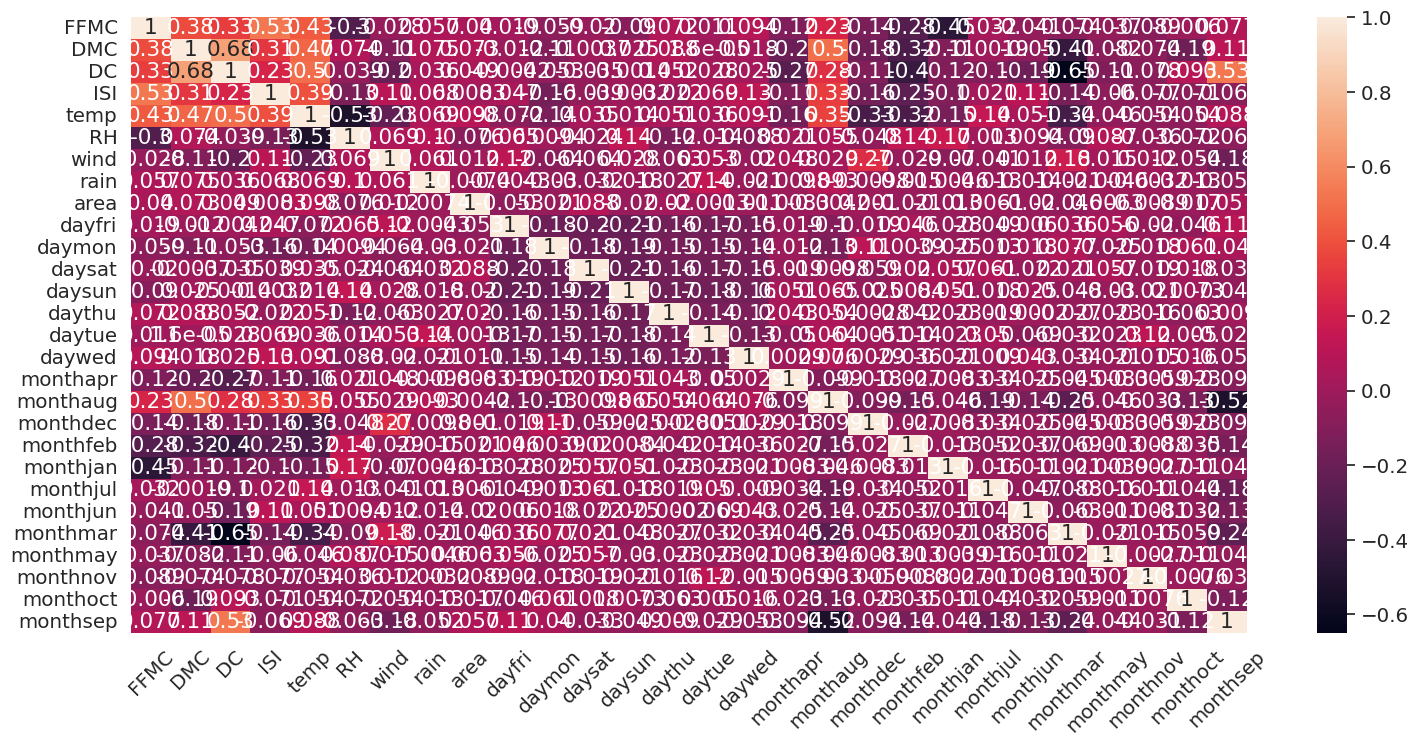

In [138]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45)

In [139]:
df.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

**Observation:**
- No missing values.
- No incorrect data types.

**Data Visualisation**

In [140]:
#Target variable
y_count = df.size_category.value_counts().reset_index().rename(columns={'index':'size_category', 'size_category':'counts'})

size_category  counts
0         small     378
1         large     139

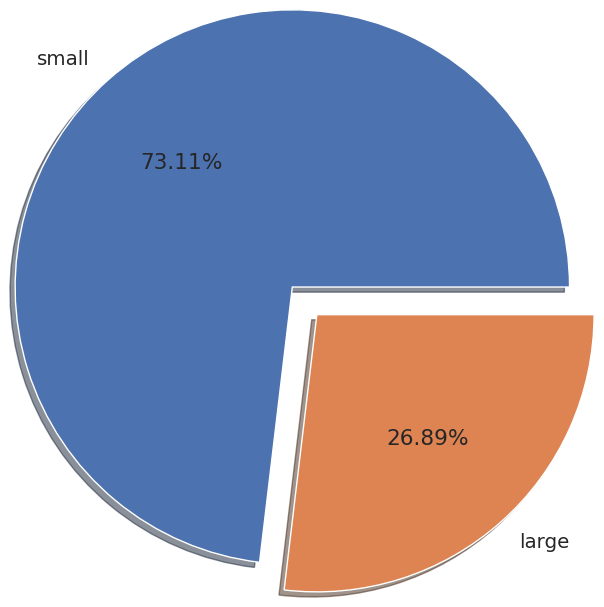

In [141]:
plt.pie(y_count.counts, labels=y_count['size_category'], shadow = True, autopct='%1.2f%%', explode=(0,0.2), radius=1.5)
y_count

In [142]:
#Other features with target variable
month_df = df.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_df.head(10)

size_category month  count
11         small   aug    141
21         small   sep    121
9          large   sep     51
1          large   aug     43
17         small   mar     42
15         small   jul     23
16         small   jun     14
13         small   feb     14
6          large   mar     12
20         small   oct     11

Text(0.5, 1.02, 'Num of fires in each month')

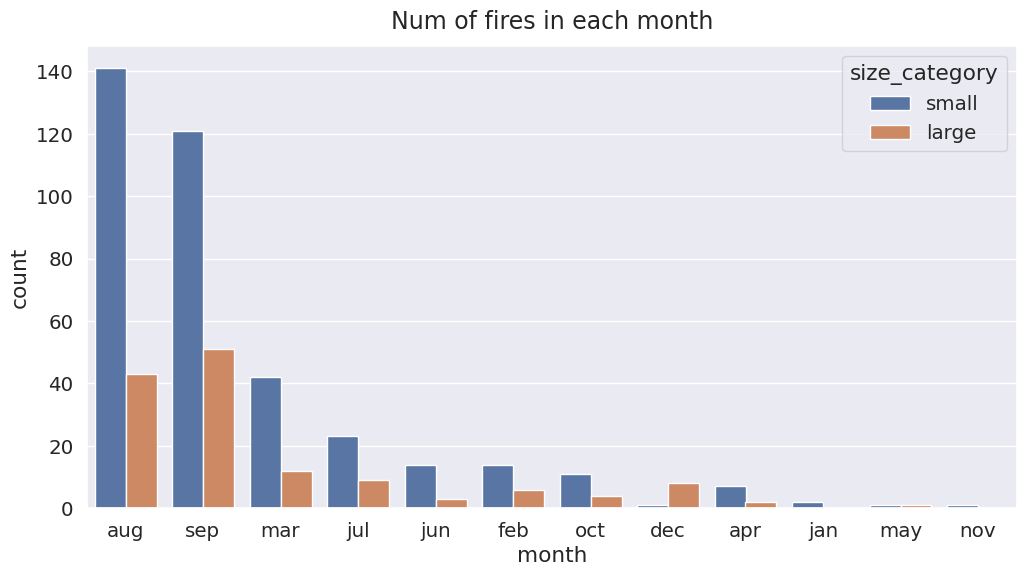

In [143]:
sns.barplot(x='month', y = 'count', hue='size_category', data=month_df)
plt.title("Num of fires in each month", fontsize=17, y=1.02)

**Observation:**
- Aug month has seen highest number of small fires.
- Whereas sep month has seen highest num of large fires.
- Least num of fires occured in month of nov.

In [144]:
day_df = df.groupby(['size_category', 'day']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
day_df

size_category  day  count
10         small  sun     68
7          small  fri     64
9          small  sat     58
8          small  mon     55
11         small  thu     48
12         small  tue     44
13         small  wed     41
3          large  sun     27
2          large  sat     26
0          large  fri     21
5          large  tue     20
1          large  mon     19
4          large  thu     13
6          large  wed     13

Text(0.5, 1.02, 'Num of fires on each day')

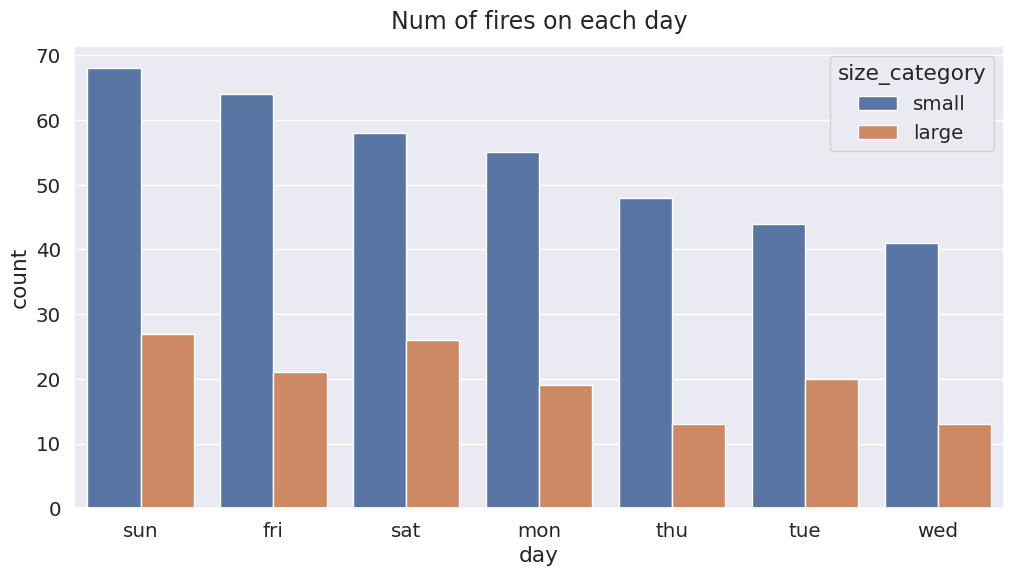

In [145]:
sns.barplot(x='day', y = 'count', hue='size_category', data=day_df)
plt.title("Num of fires on each day", fontsize=17, y=1.02)

In [146]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:,-1])
df['size_category']                                                 #1 for small, 0 for large

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [147]:
rain_df = df.groupby(['size_category', 'rain']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
rain_df

size_category  rain  count
2              1   0.0    371
0              0   0.0    138
3              1   0.2      2
5              1   0.8      2
1              0   6.4      1
4              1   0.4      1
6              1   1.0      1
7              1   1.4      1

Text(0.5, 1.02, 'Rainfall level in diff category of forest')

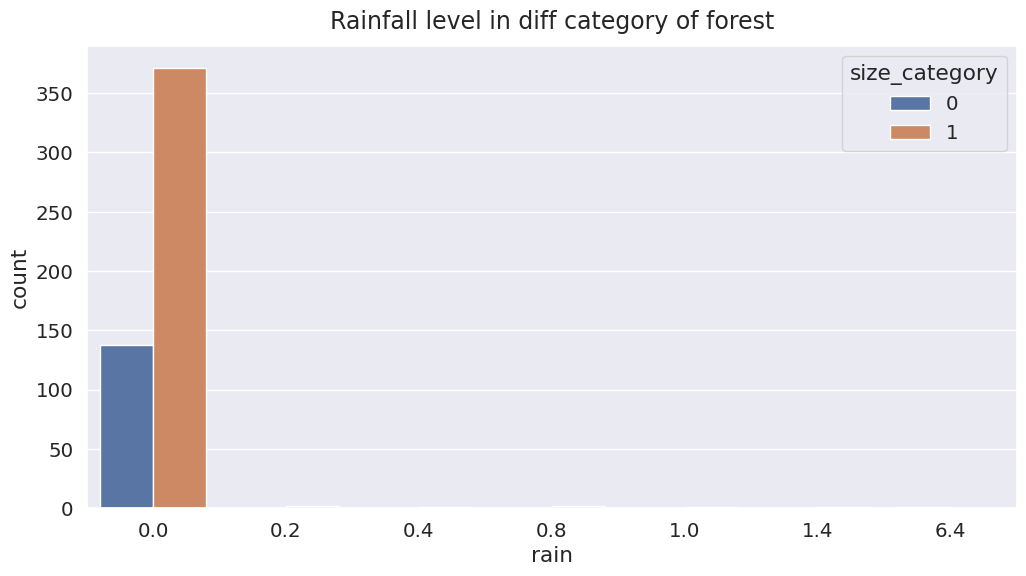

In [148]:
sns.barplot(x='rain', y='count', hue='size_category', data=rain_df)
plt.title("Rainfall level in diff category of forest", y=1.02, fontsize=17)

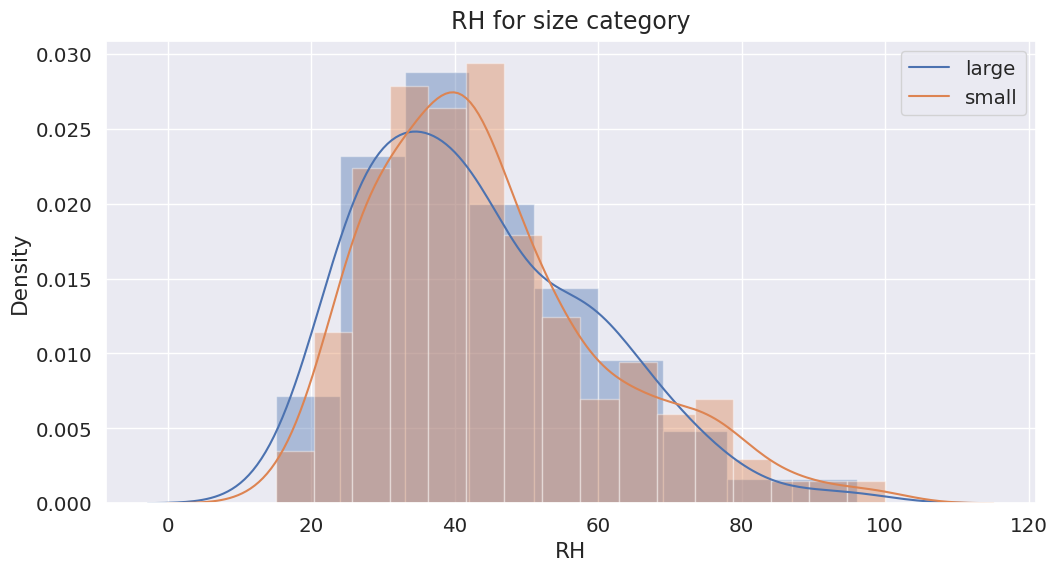

In [149]:
sns.distplot(df[df['size_category']==0]['RH'])
sns.distplot(df[df['size_category']==1]['RH'])                 #orange for small fire, blue for small fire
plt.title("RH for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

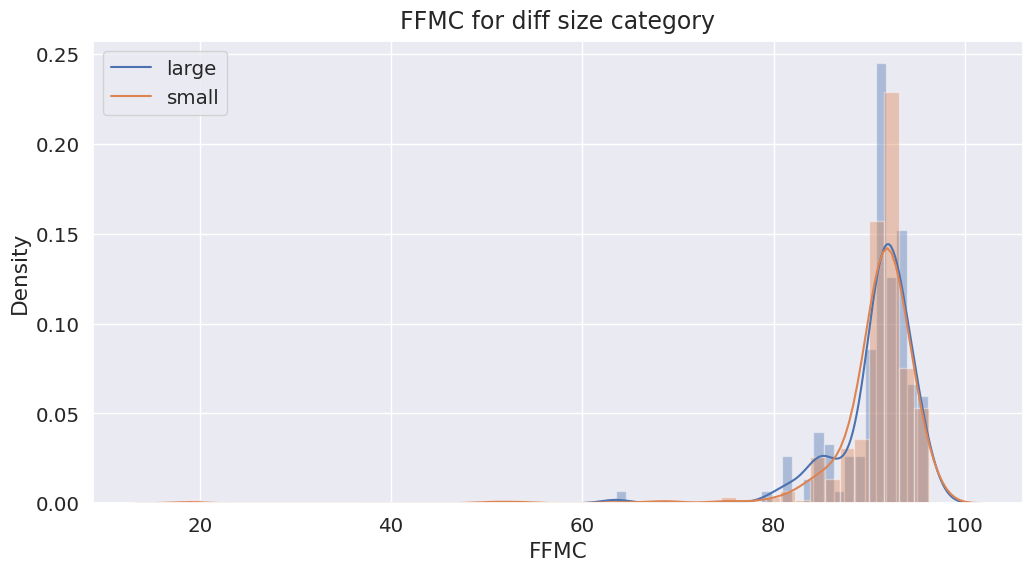

In [150]:
sns.distplot(df[df['size_category']==0]['FFMC'])
sns.distplot(df[df['size_category']==1]['FFMC'])                 #orange for small fire, blue for small fire
plt.title("FFMC for diff size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

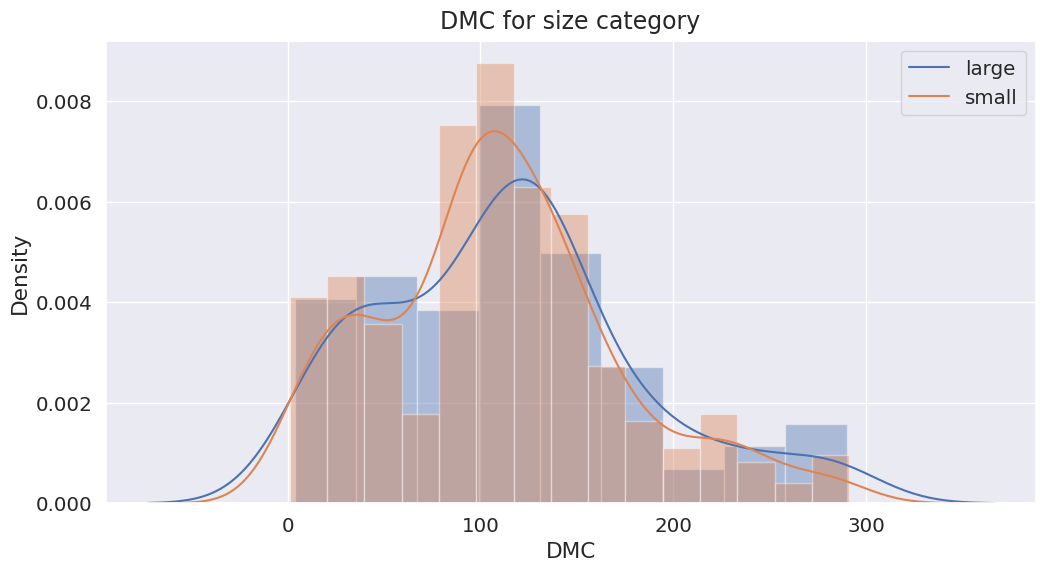

In [151]:
sns.distplot(df[df['size_category']==0]['DMC'])
sns.distplot(df[df['size_category']==1]['DMC'])                 #orange for small fire, blue for large fire
plt.title("DMC for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

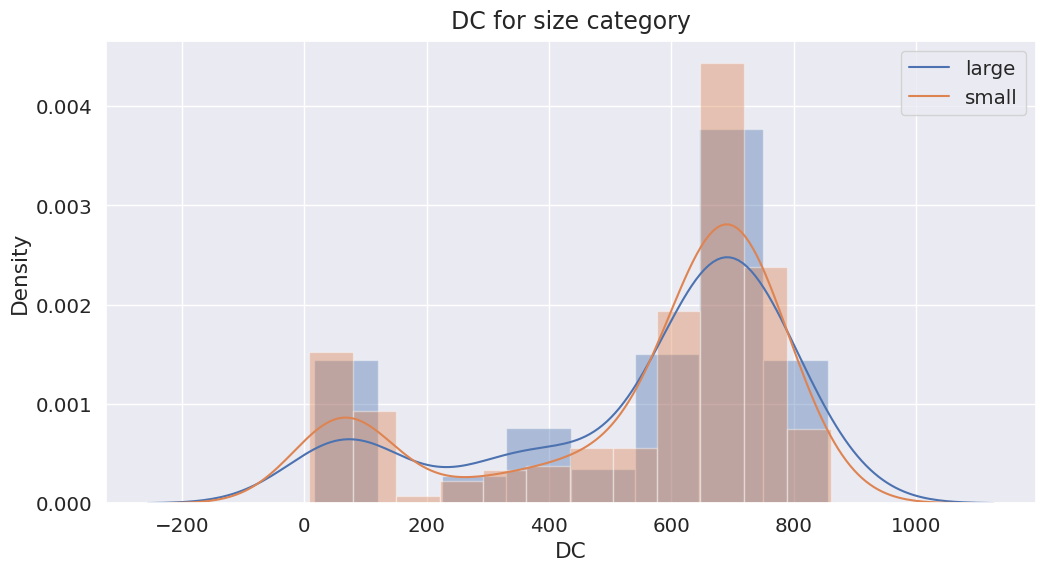

In [152]:
sns.distplot(df[df['size_category']==0]['DC'])
sns.distplot(df[df['size_category']==1]['DC'])                 #orange for small fire, blue for large fire
plt.title("DC for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

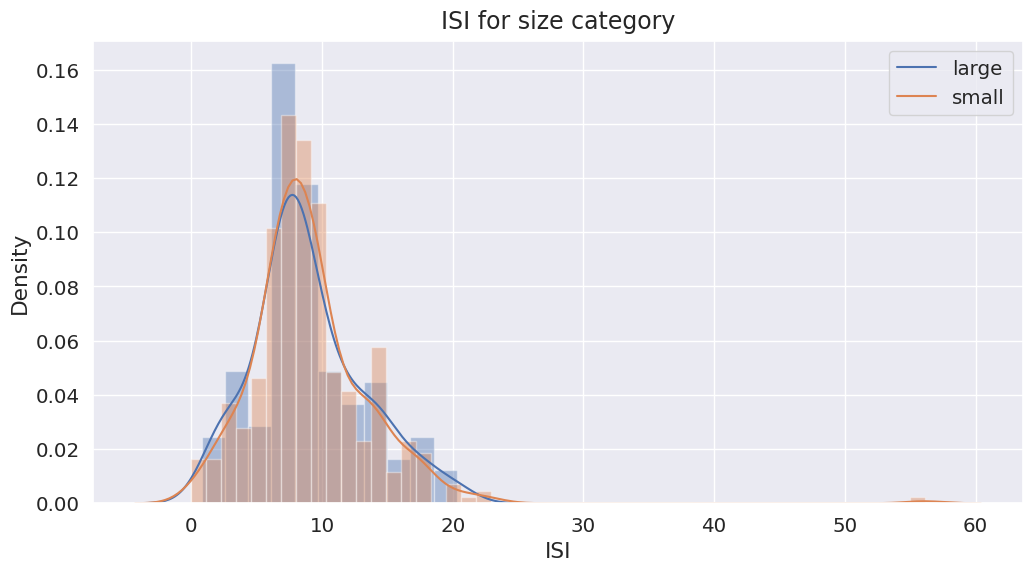

In [153]:
sns.distplot(df[df['size_category']==0]['ISI'])
sns.distplot(df[df['size_category']==1]['ISI'])                 #orange for small fire, blue for large fire
plt.title("ISI for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

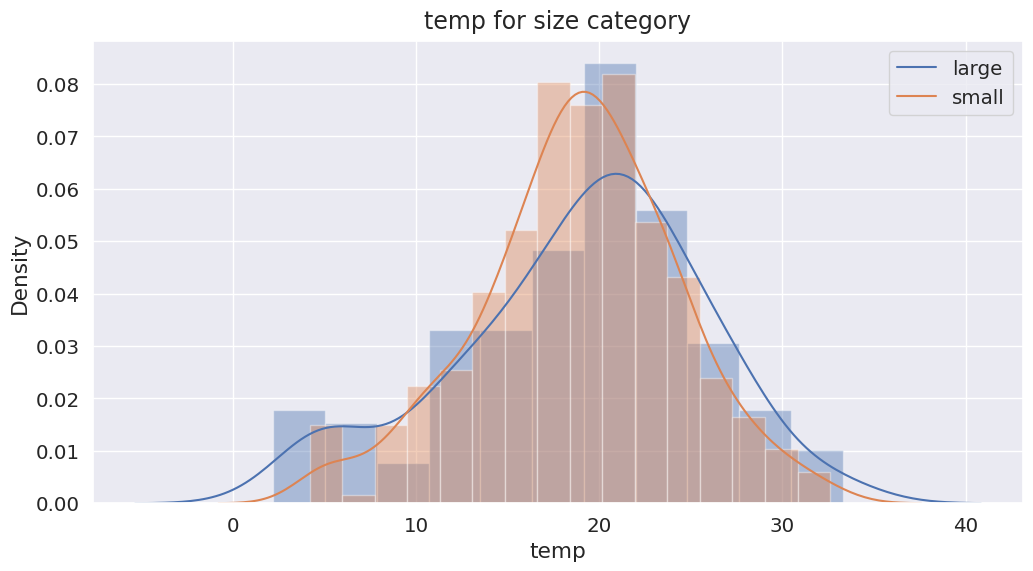

In [154]:
sns.distplot(df[df['size_category']==0]['temp'])
sns.distplot(df[df['size_category']==1]['temp'])                 #orange for small fire, blue for large fire
plt.title("temp for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

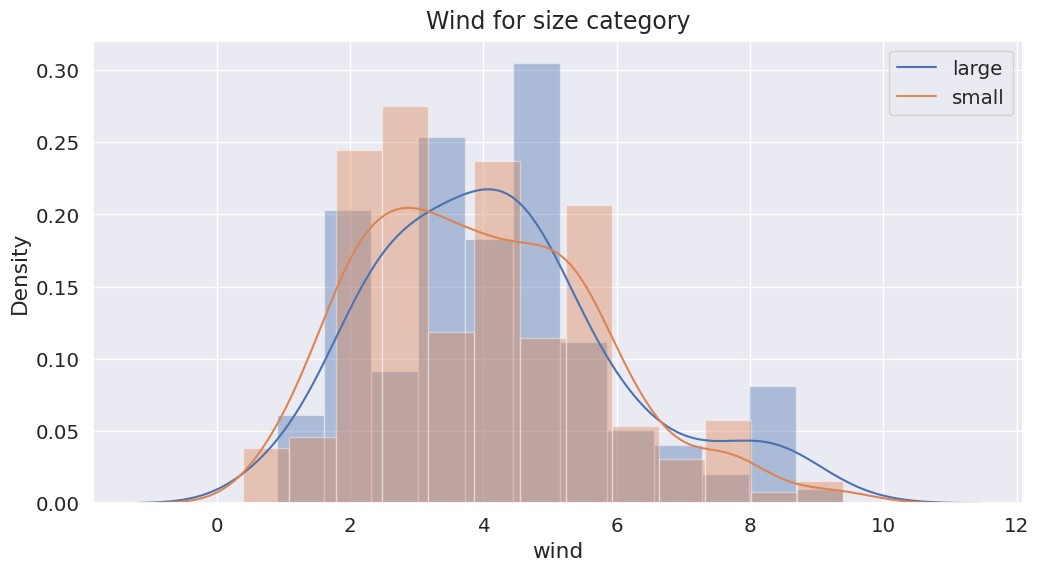

In [155]:
sns.distplot(df[df['size_category']==0]['wind'])
sns.distplot(df[df['size_category']==1]['wind'])                 #orange for small fire, blue for large fire
plt.title("Wind for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

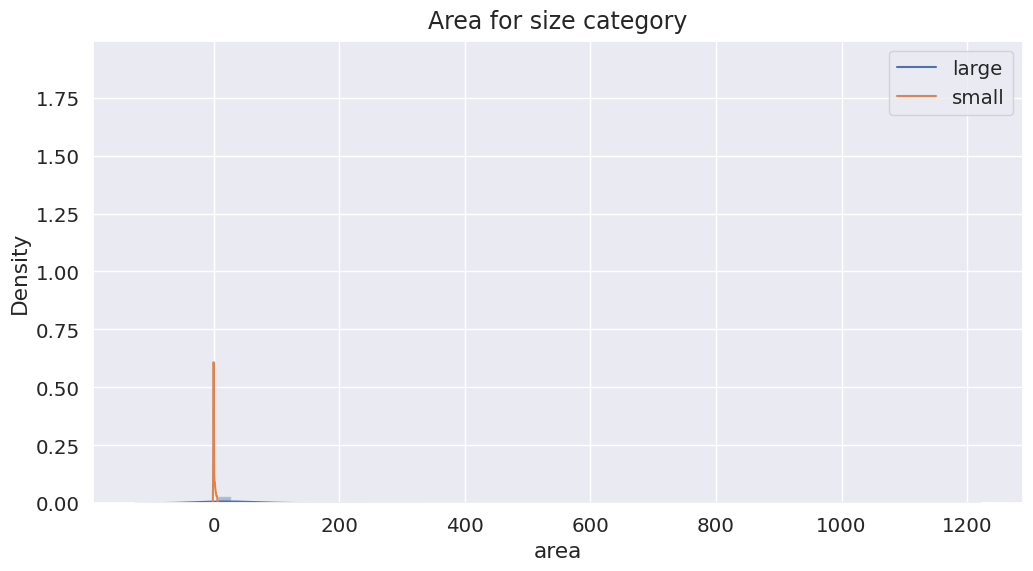

In [156]:
sns.distplot(df[df['size_category']==0]['area'])
sns.distplot(df[df['size_category']==1]['area'])                 #orange for small fire, blue for large fire
plt.title("Area for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

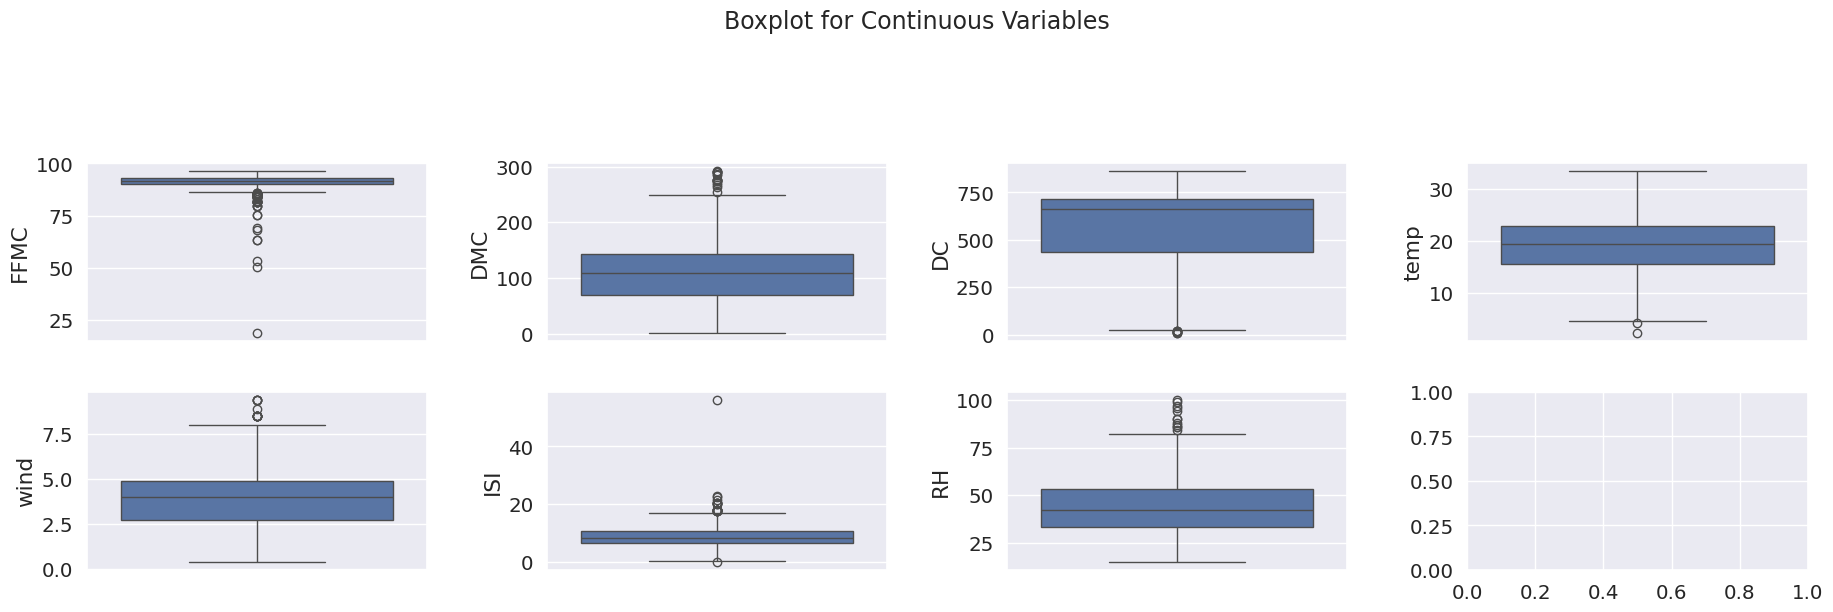

In [157]:
#check for outliers
fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(df.FFMC, ax=ax[0,0])
sns.boxplot(df.DMC, ax=ax[0,1])
sns.boxplot(df.DC, ax=ax[0,2])
sns.boxplot(df.temp, ax=ax[0,3])
sns.boxplot(df.wind, ax=ax[1,0])
sns.boxplot(df.ISI, ax=ax[1,1])
sns.boxplot(df.RH, ax=ax[1,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

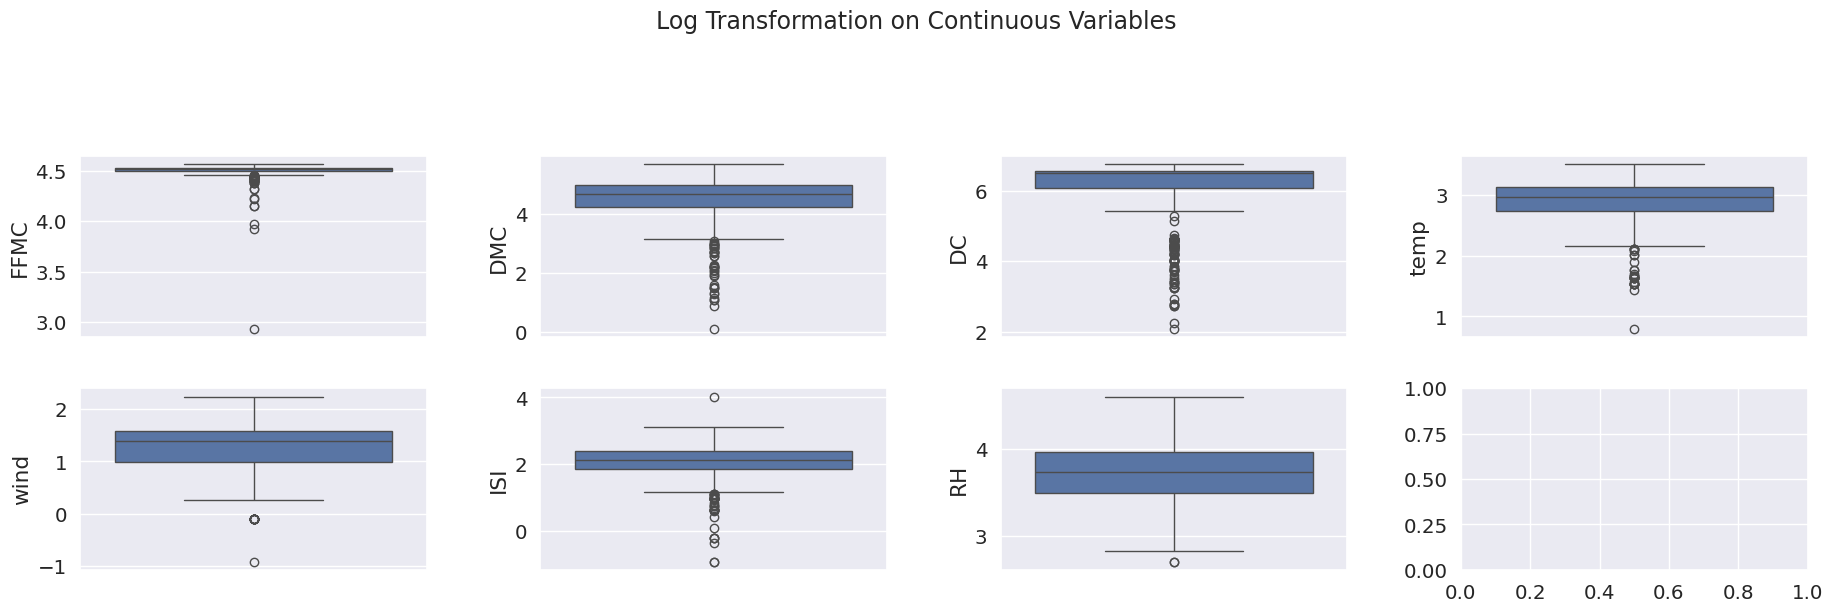

In [158]:
#Let ustry to treat our outliers by log tranformations
fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.log(df.FFMC), ax=ax[0,0])
sns.boxplot(np.log(df.DMC), ax=ax[0,1])
sns.boxplot(np.log(df.DC), ax=ax[0,2])
sns.boxplot(np.log(df.temp), ax=ax[0,3])
sns.boxplot(np.log(df.wind), ax=ax[1,0])
sns.boxplot(np.log(df.ISI), ax=ax[1,1])
sns.boxplot(np.log(df.RH), ax=ax[1,2])
plt.suptitle("Log Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

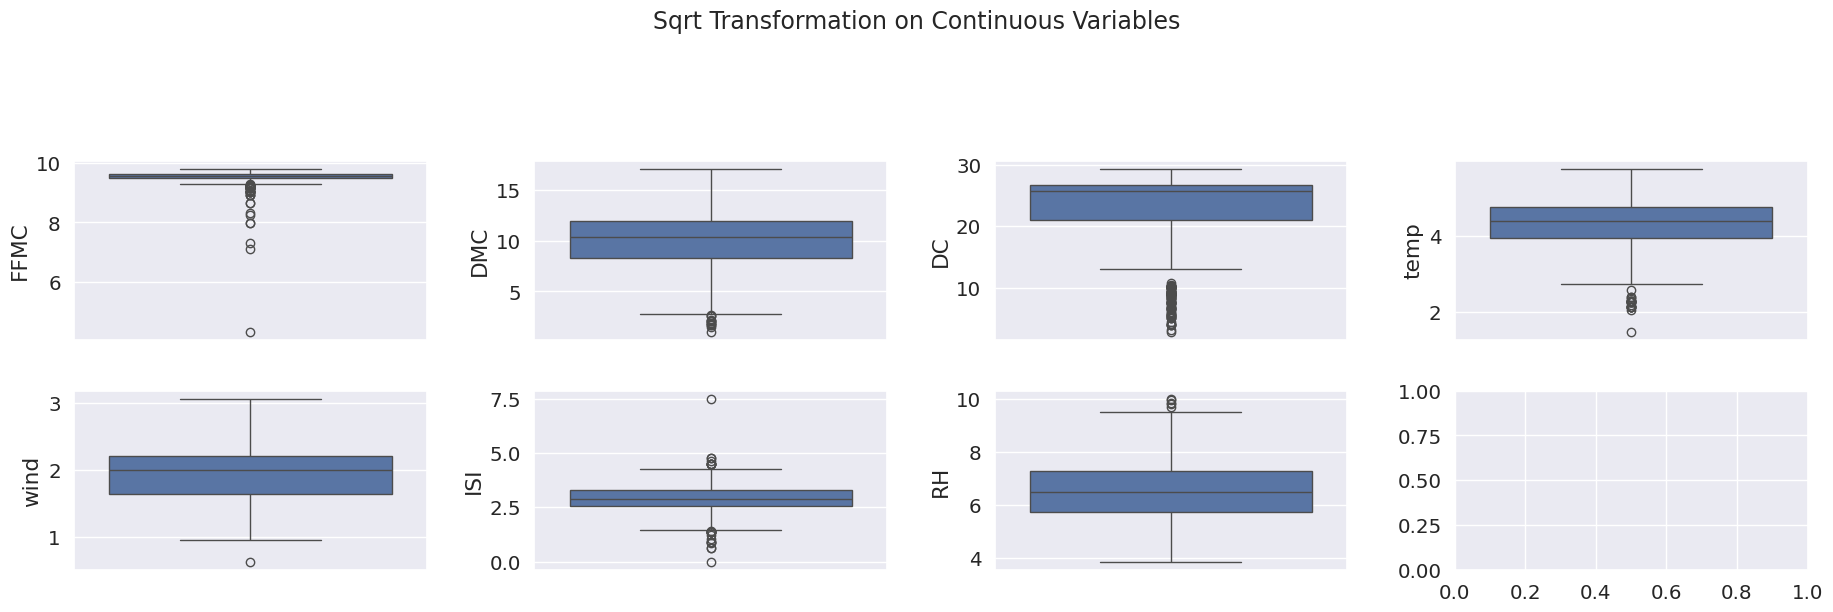

In [159]:
#Let ustry to treat our outliers by sqrt tranformations
fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.sqrt(df.FFMC), ax=ax[0,0])
sns.boxplot(np.sqrt(df.DMC), ax=ax[0,1])
sns.boxplot(np.sqrt(df.DC), ax=ax[0,2])
sns.boxplot(np.sqrt(df.temp), ax=ax[0,3])
sns.boxplot(np.sqrt(df.wind), ax=ax[1,0])
sns.boxplot(np.sqrt(df.ISI), ax=ax[1,1])
sns.boxplot(np.sqrt(df.RH), ax=ax[1,2])
plt.suptitle("Sqrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

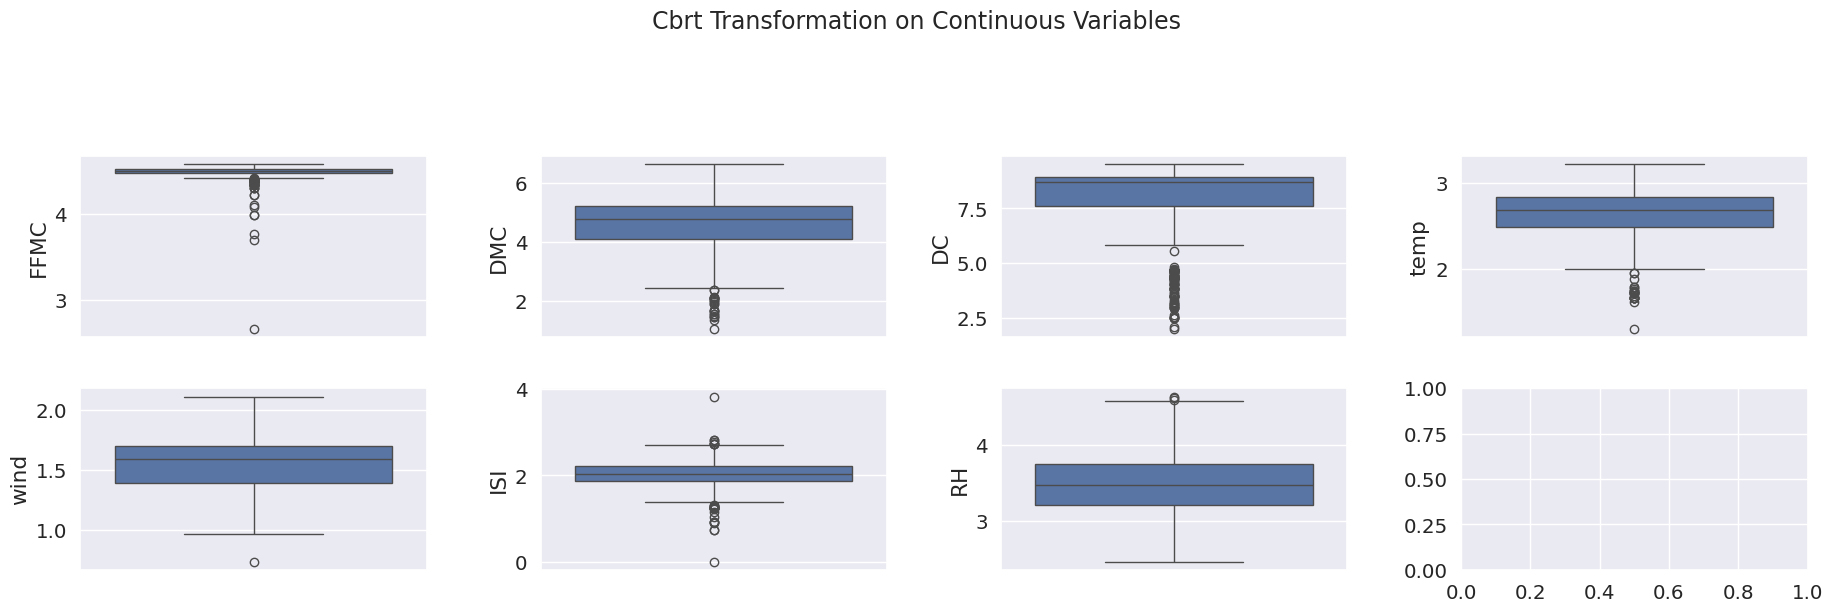

In [160]:
#Let ustry to treat our outliers by cbrt tranformations
fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.cbrt(df.FFMC), ax=ax[0,0])
sns.boxplot(np.cbrt(df.DMC), ax=ax[0,1])
sns.boxplot(np.cbrt(df.DC), ax=ax[0,2])
sns.boxplot(np.cbrt(df.temp), ax=ax[0,3])
sns.boxplot(np.cbrt(df.wind), ax=ax[1,0])
sns.boxplot(np.cbrt(df.ISI), ax=ax[1,1])
sns.boxplot(np.cbrt(df.RH), ax=ax[1,2])
plt.suptitle("Cbrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

In [161]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [162]:
#to get correlation of target variable with numerical columns
df1 = df.drop(['month','day','dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'], axis=1)
df1.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  size_category
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0              1
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0              1
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0              1
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0              1
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0              1

In [163]:
corr = pd.DataFrame(data = df1.corr().iloc[:,-1], index=df1.columns)
corr

size_category
FFMC               -0.022063
DMC                -0.034715
DC                 -0.019428
ISI                 0.008726
temp               -0.006021
RH                  0.045243
wind               -0.059113
rain               -0.050001
area               -0.311322
size_category       1.000000

Text(0.5, 1.01, 'Correlation plot of Target variable with other continuous features')

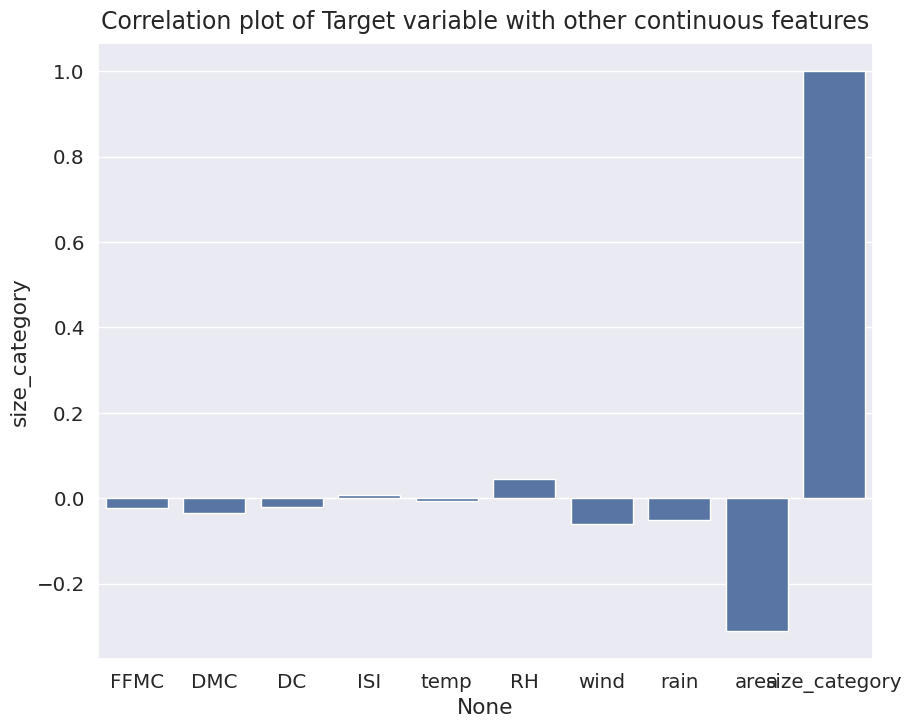

In [164]:
fig , ax=plt.subplots(figsize=(10,8))
sns.barplot(x = corr.index, y = corr.iloc[:,0])
plt.title('Correlation plot of Target variable with other continuous features', fontsize=17, y =1.01)

Text(0.5, 1.0, 'Correlation Map of Numerical variables')

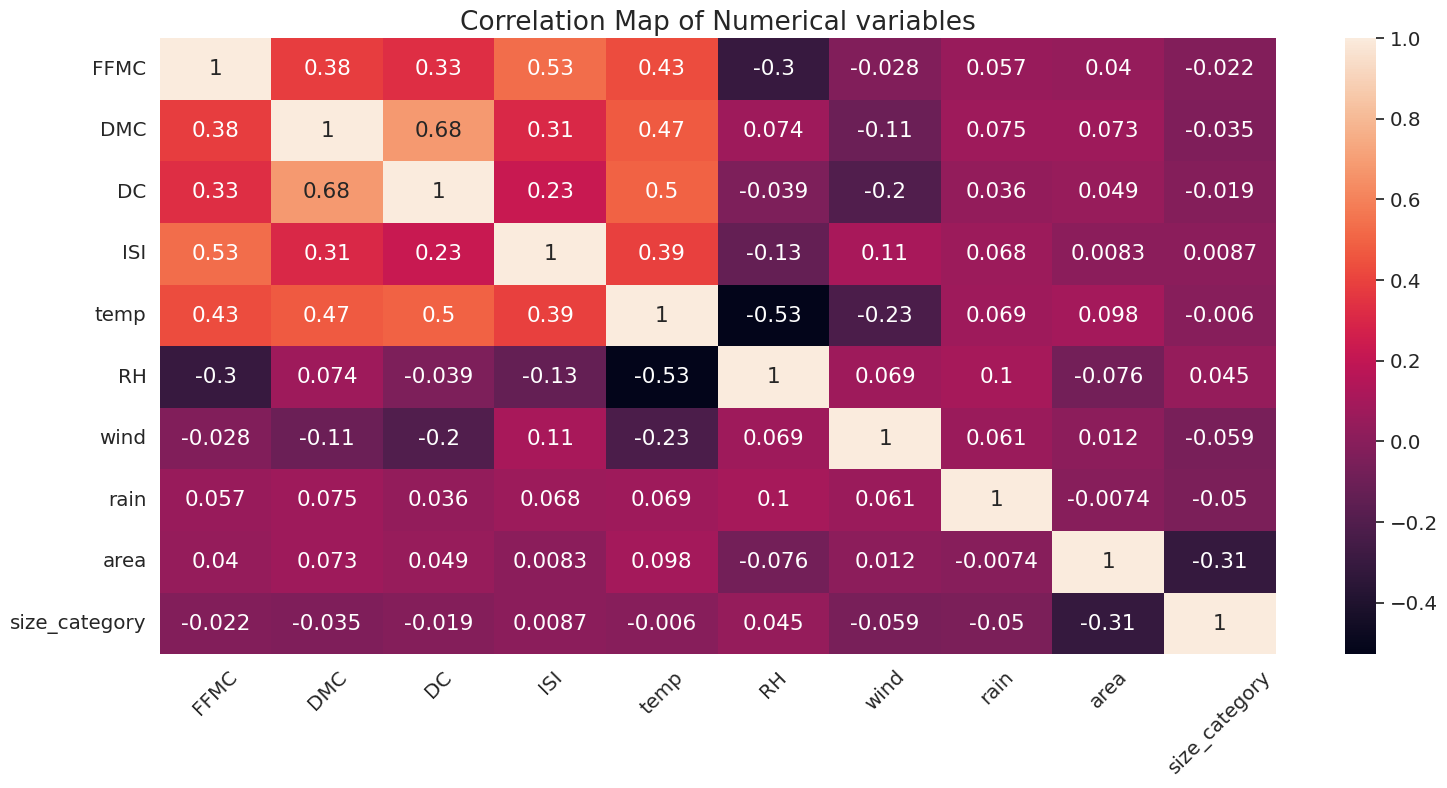

In [165]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(df1.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of Numerical variables", fontsize=19)

Text(0.5, 1.01, 'Pairplot for all numerical variables')

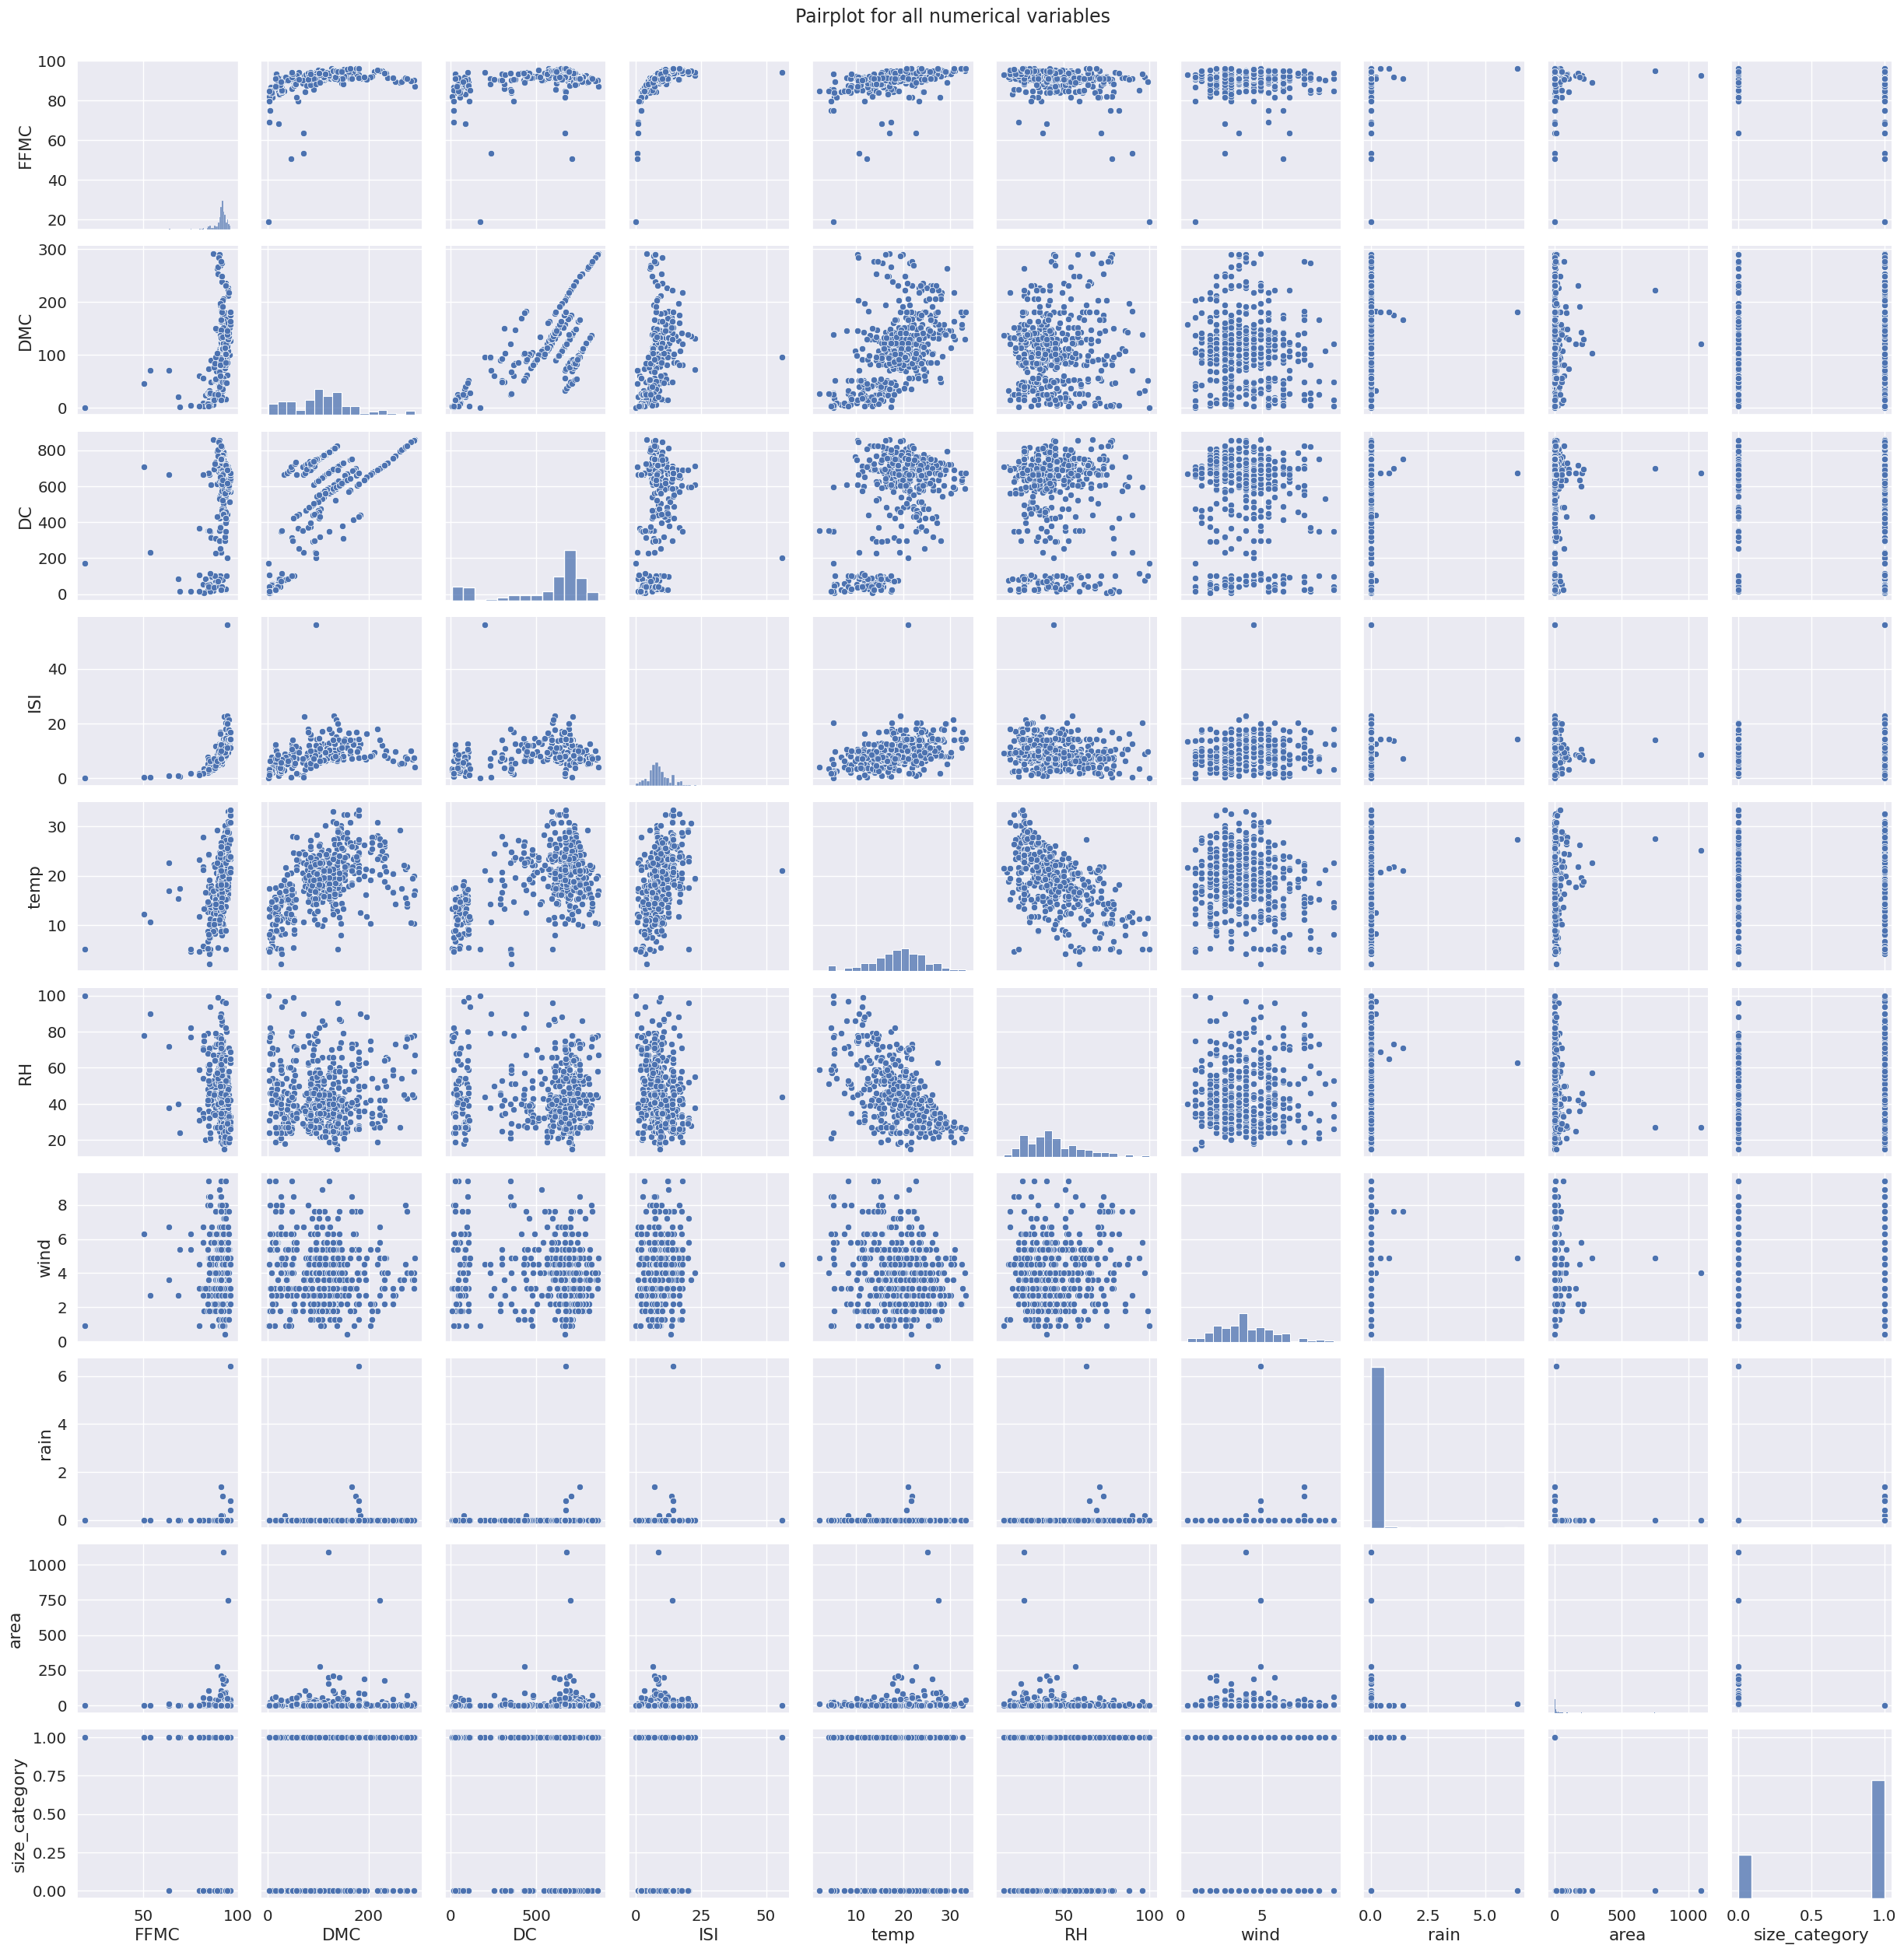

In [166]:
sns.pairplot(df1)
plt.suptitle("Pairplot for all numerical variables", y = 1.01, fontsize=17)

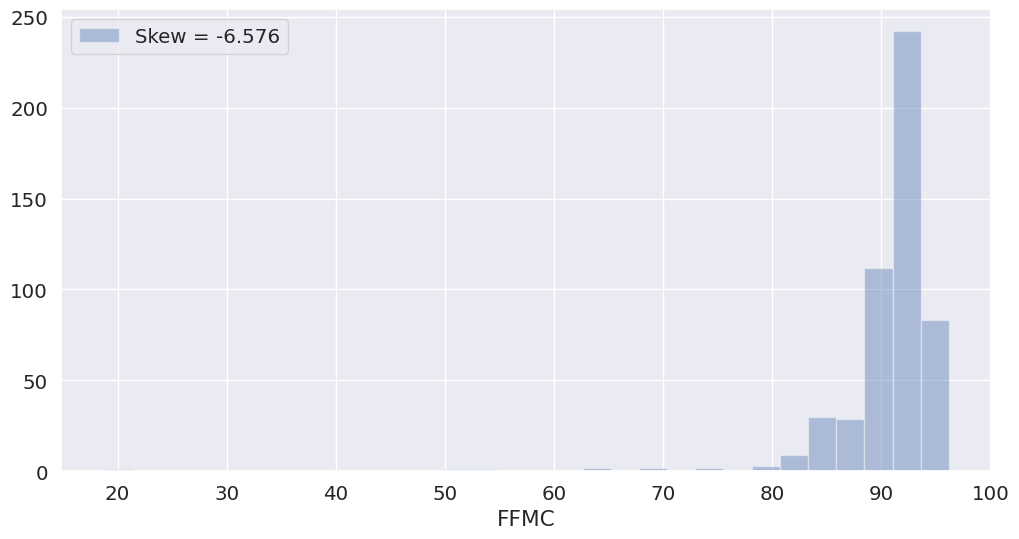

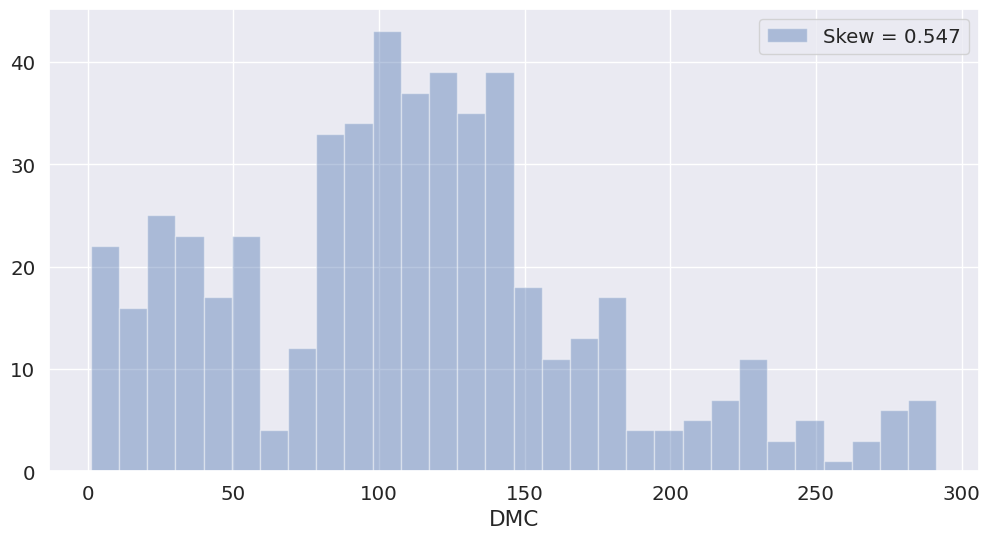

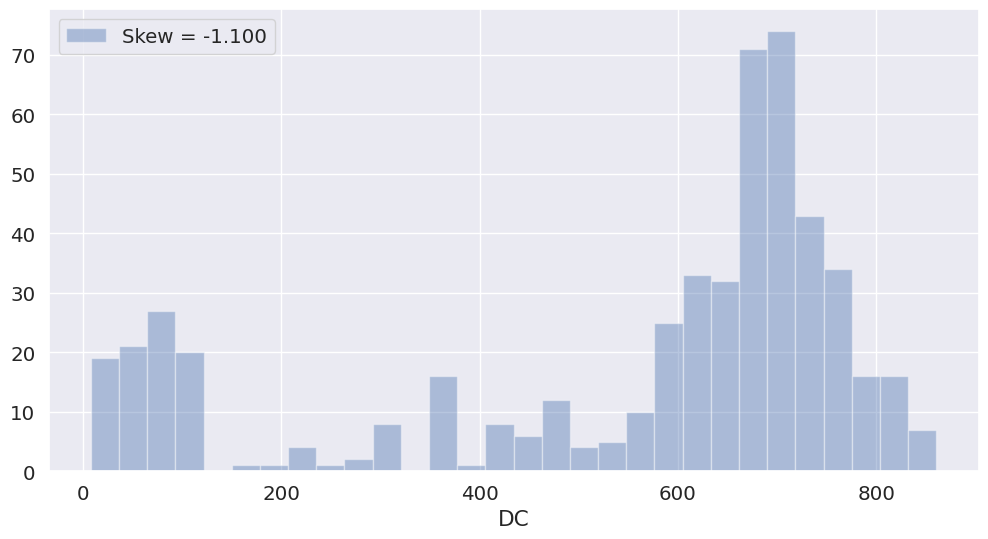

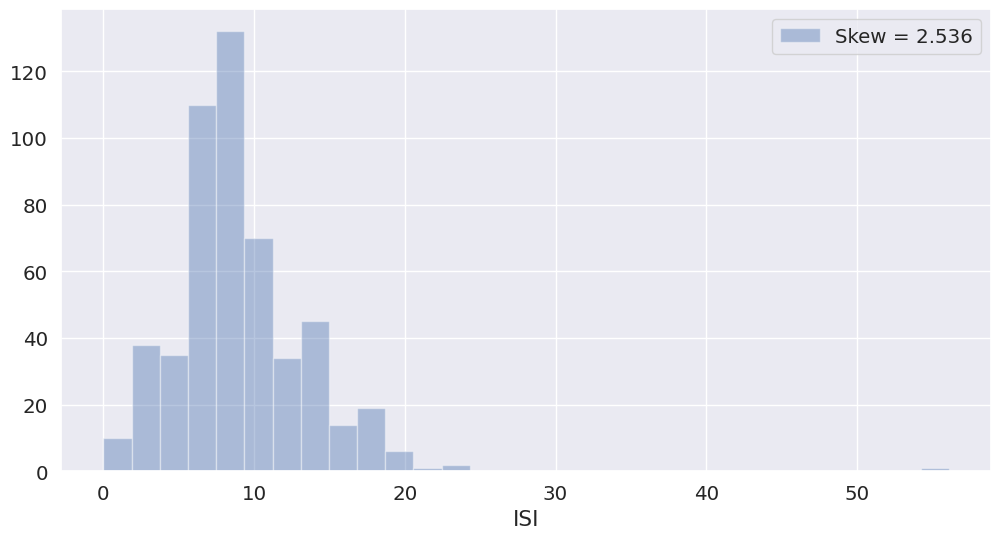

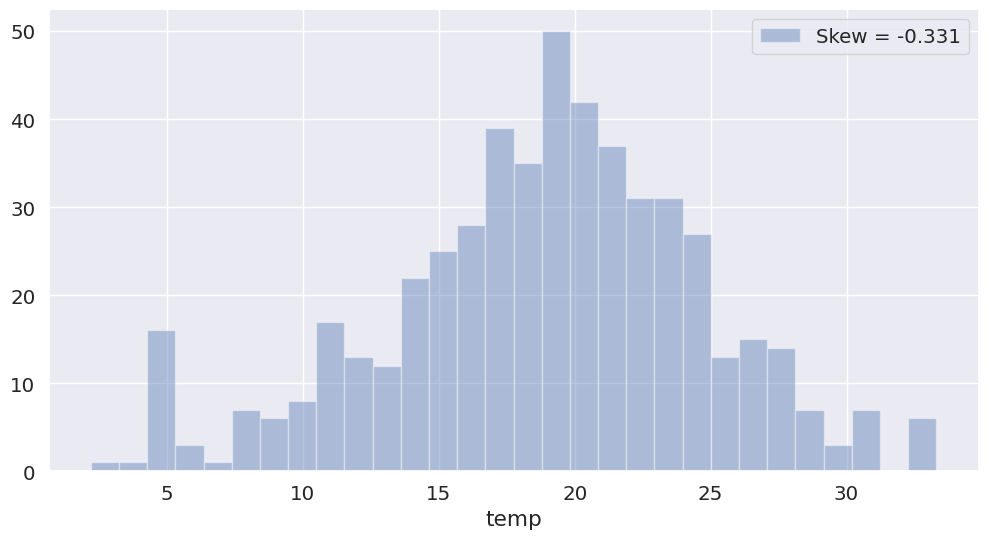

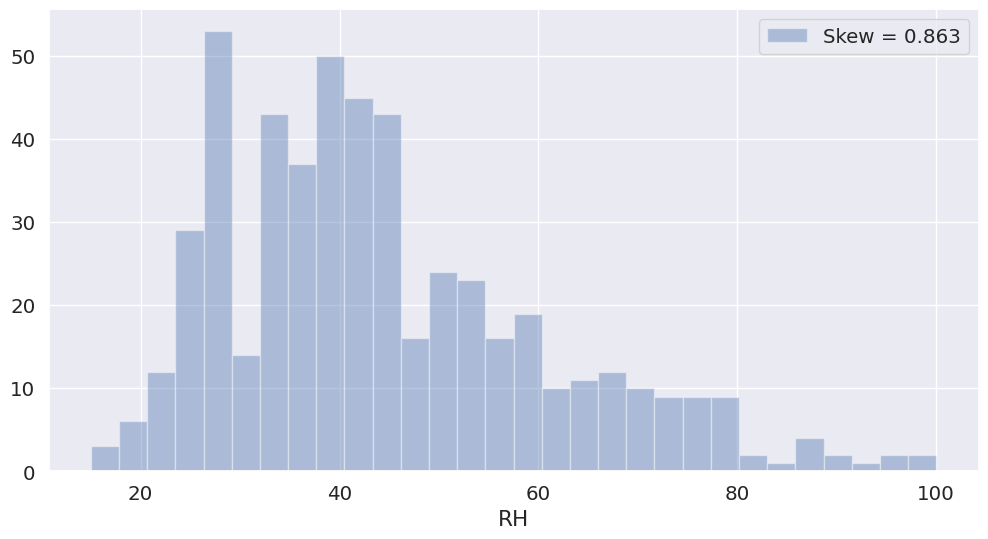

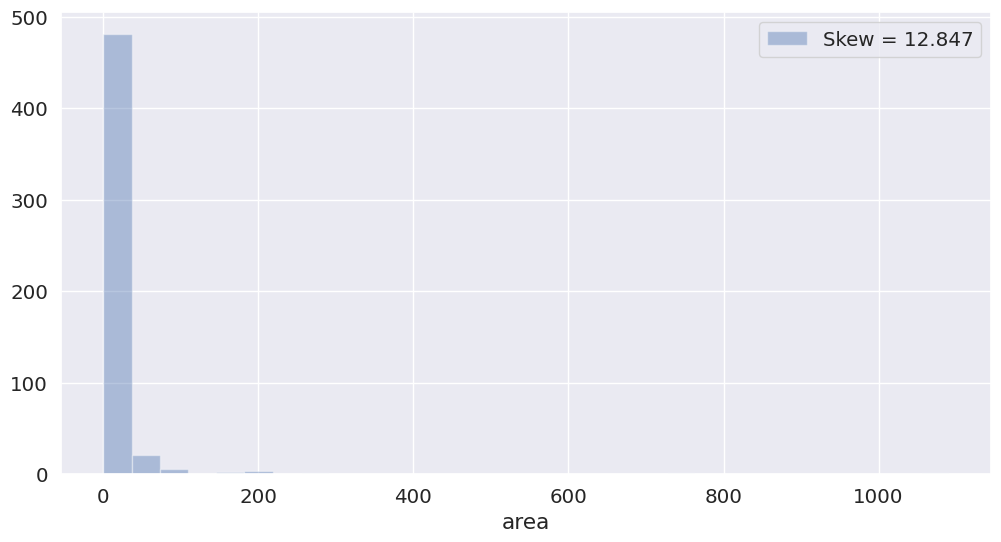

In [167]:
for feat in continuous_feature:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

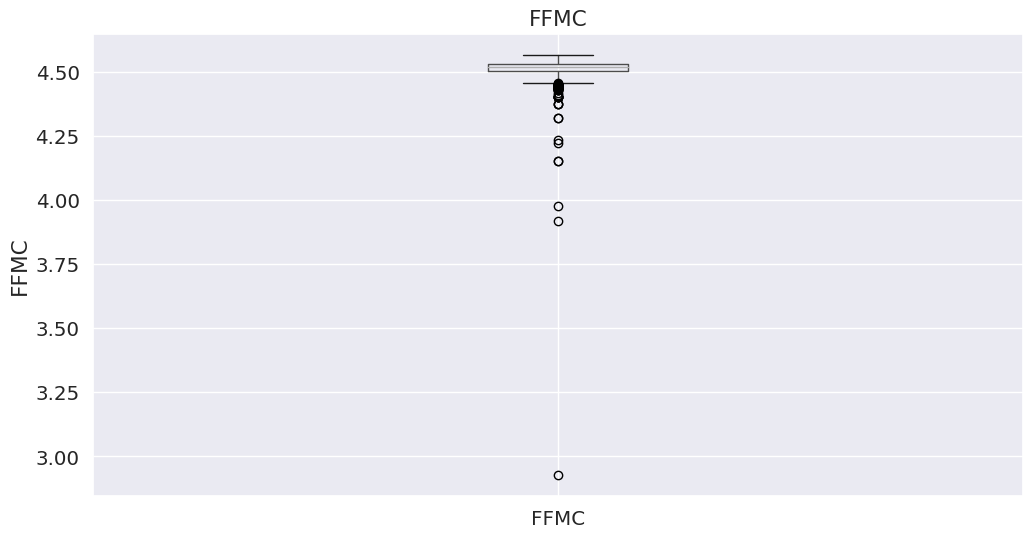

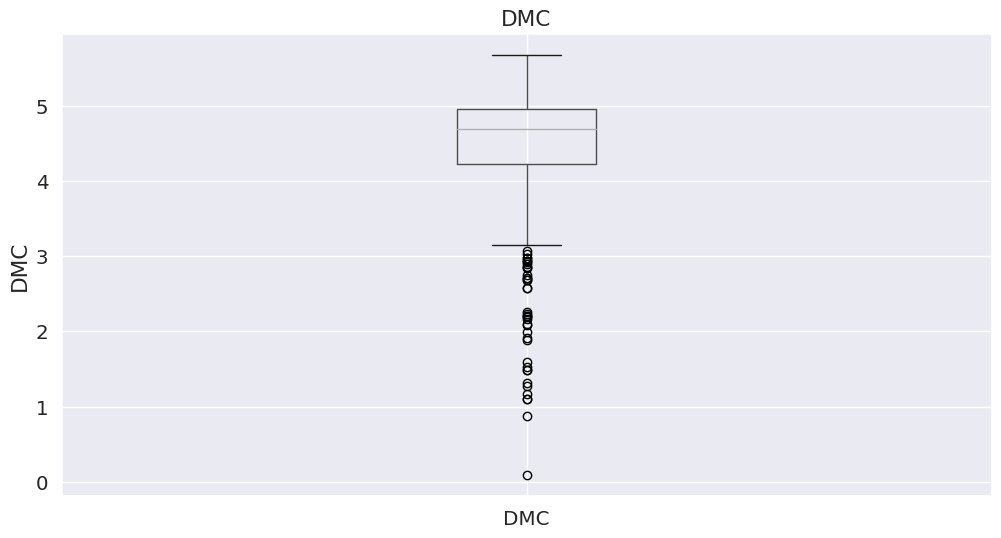

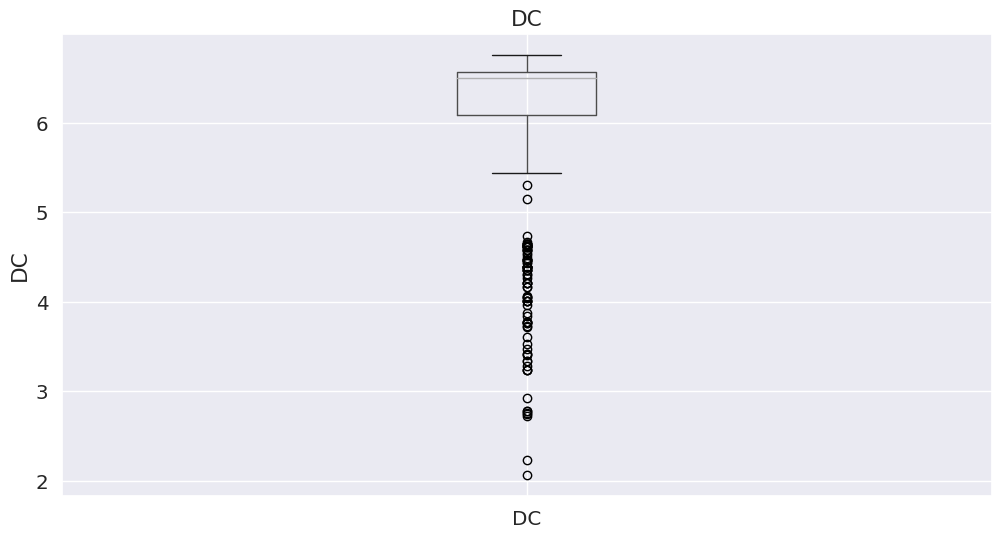

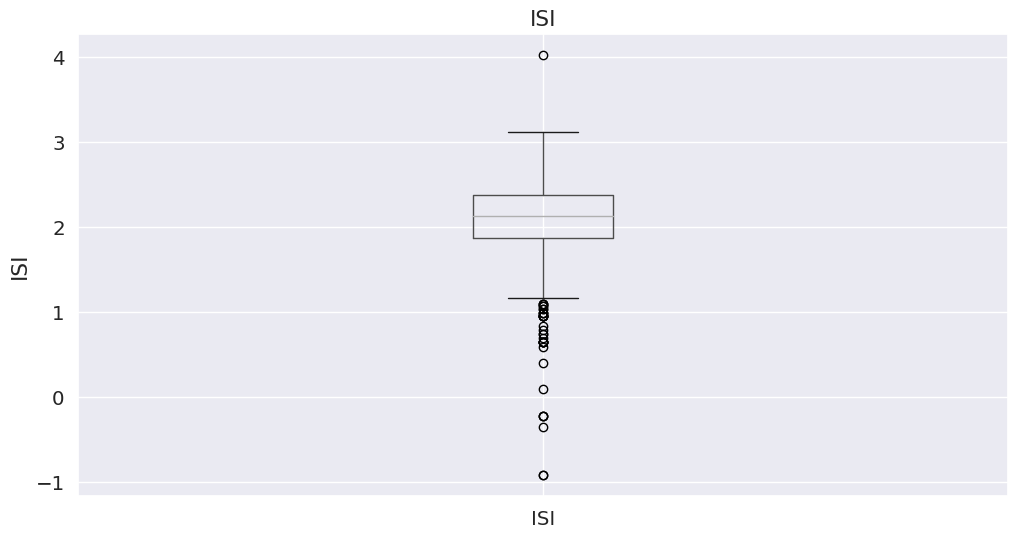

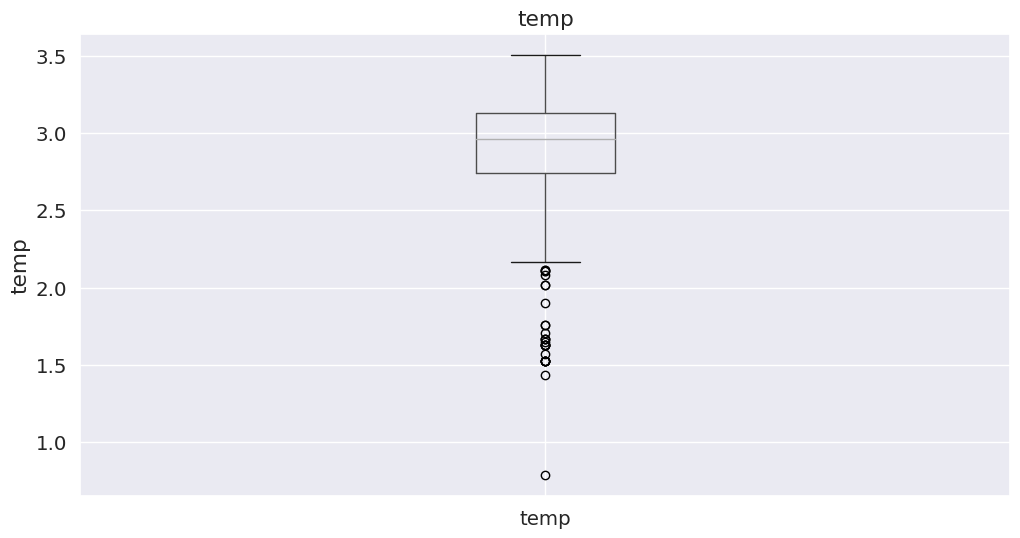

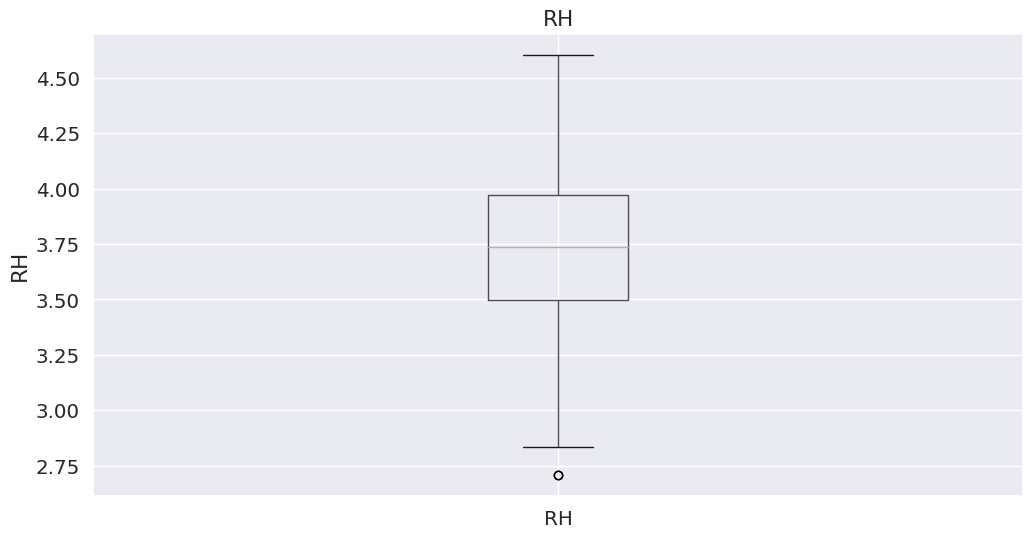

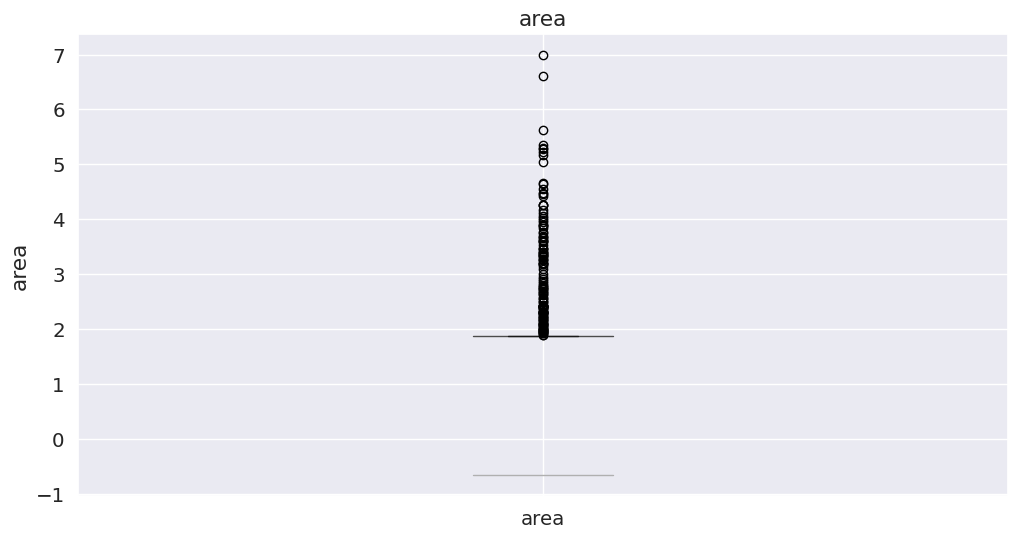

In [168]:
for feature in continuous_feature:
    data=df.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


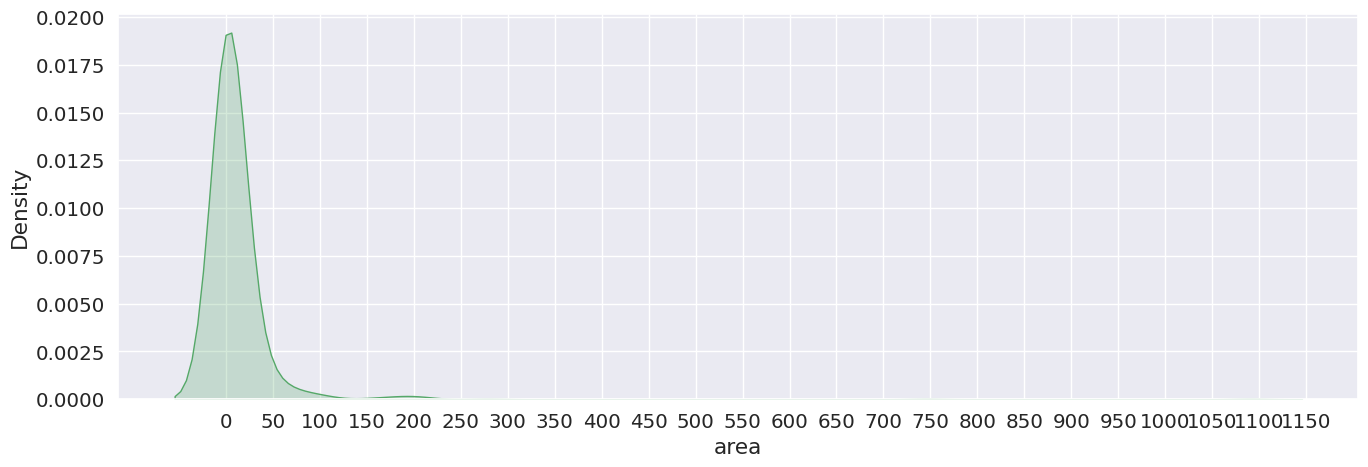

In [169]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['area'].skew()))
print("Kurtosis: {}".format(df['area'].kurtosis()))
ax = sns.kdeplot(df['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

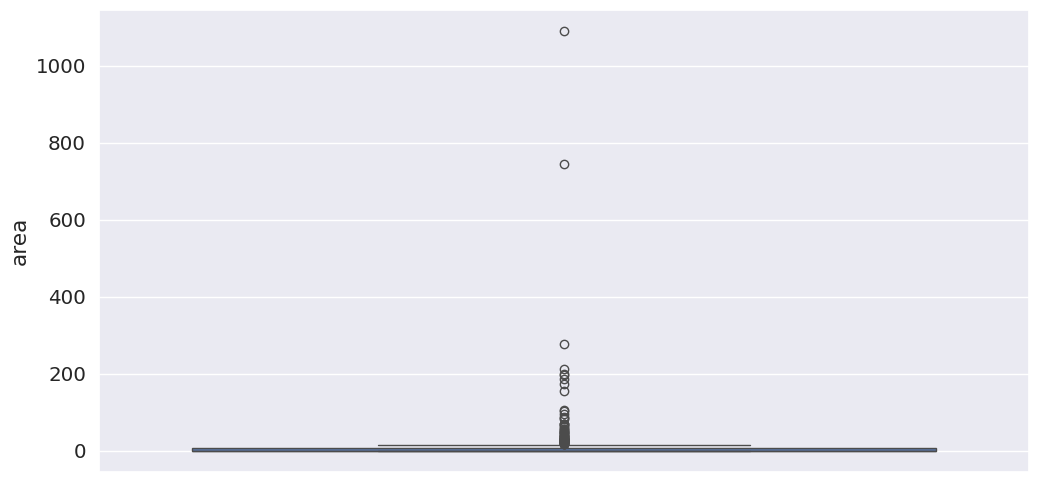

In [170]:
ax = sns.boxplot(df['area'])

In [171]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
df[categorical_features].head()

Number of Categorical Features: 2 
 ['month', 'day']


month  day
0   mar  fri
1   oct  tue
2   oct  sat
3   mar  fri
4   mar  sun

In [172]:
for feature in df.columns:
    if df[feature].dtypes == 'object':# in pandas it is object
        unique_cat = len(df[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(df[feature].value_counts())
        print()

Feature 'month' has 12 unique categories
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

Feature 'day' has 7 unique categories
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64



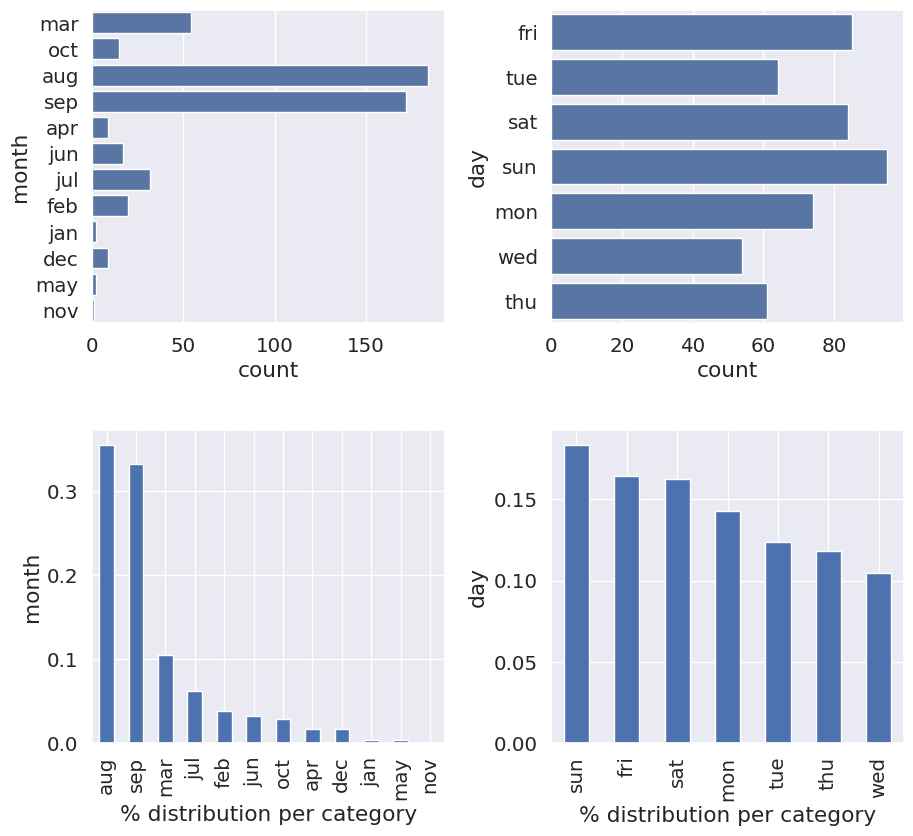

In [173]:
plt.figure(figsize=(14,12))
for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data=df,y=col)
    plt.subplot(3,3,i+3)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [174]:
print(df['area'].describe(),'\n')

df=df.copy()
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64 



month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0   

   daymon  daysat  daysun  ...  daywed  monthapr  monthaug  monthdec  \
0       0       0       0  ...       0         0         0         0   
1       0       0       0  ...       0         0         0         0   
2       0       1       0  ...       0         0         0         0   
3       0       0       0  ...       0         0         0         0   
4       0       0       1  ...       0         0         0         0   

   monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0         0         0         0         0         1         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         1         0         0   
4         0         0         0         0         1         0         0   

   monthoct  monthsep  size_category  damage_category  
0         0         0              1        No damage  
1         1         0              1        No damage  
2         1         0              1        No damage  
3         0         0              1        No damage  
4         0         0              1        No damage  

[5 rows x 32 columns]

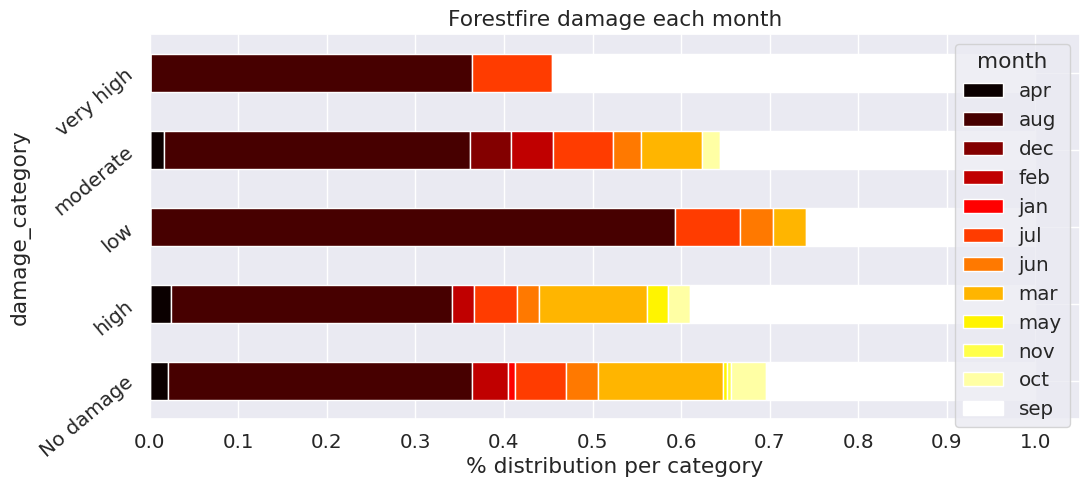

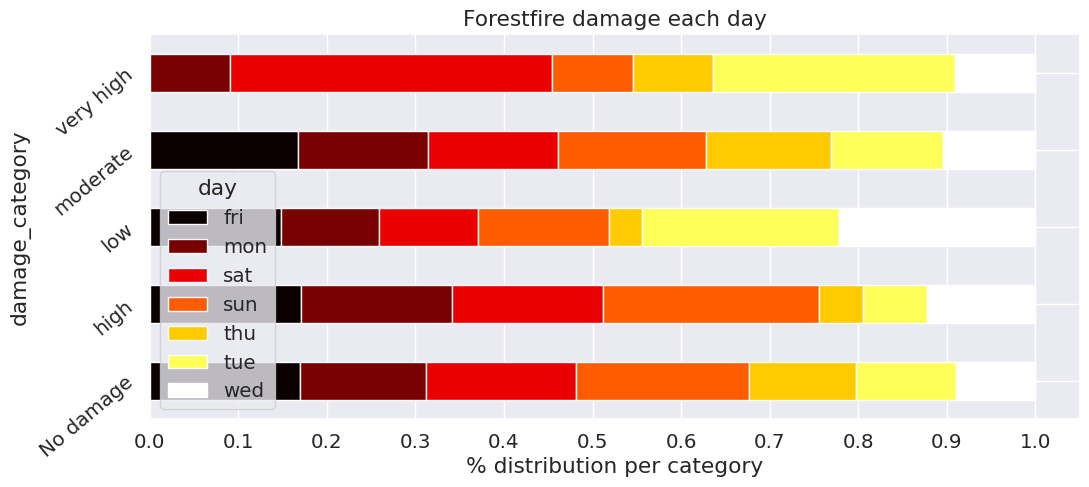

In [175]:
for col in categorical_features:
    if col!="size_category":
        cross = pd.crosstab(index=df['damage_category'],columns=df[col],normalize='index')
        cross.plot.barh(stacked=True,rot=40,cmap='hot',figsize=(12, 5))
        plt.xlabel('% distribution per category')
        plt.xticks(np.arange(0,1.1,0.1))
        plt.title("Forestfire damage each {}".format(col))

plt.show()

In [176]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(df[feature].unique()),feature))

12 number of unique categories in feature named month
7 number of unique categories in feature named day


In [177]:
continuous_feature

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'area']

In [178]:
#drop the unnecessary columns
df.drop(['month', 'day', 'monthjan', 'daymon'], axis=1, inplace=True)

In [179]:
pd.set_option("display.max_columns", 27)
df.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  daysat  daysun  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1       0       0   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0       0       0   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0       1       0   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1       0       0   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0       0       1   

   daythu  ...  monthapr  monthaug  monthdec  monthfeb  monthjul  monthjun  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   monthmar  monthmay  monthnov  monthoct  monthsep  size_category  \
0         1         0         0         0         0              1   
1         0         0         0         1         0              1   
2         0         0         0         1         0              1   
3         1         0         0         0         0              1   
4         1         0         0         0         0              1   

   damage_category  
0        No damage  
1        No damage  
2        No damage  
3        No damage  
4        No damage  

[5 rows x 28 columns]

In [181]:
outliers

FFMC   DMC     DC   ISI  temp   RH  wind  rain   area  dayfri  daysat  \
281  85.4  25.4  349.7   2.6   5.1   24   8.5   0.0  24.77       0       0   
299  53.4  71.0  233.8   0.4  10.6   90   2.7   0.0   0.00       0       1   
379  18.7   1.1  171.4   0.0   5.2  100   0.9   0.0   0.00       0       0   
463  75.1   4.4   16.2   1.9   4.6   82   6.3   0.0   5.39       0       0   
464  75.1   4.4   16.2   1.9   5.1   77   5.4   0.0   2.14       0       0   
469  91.0  14.6   25.6  12.3  13.7   33   9.4   0.0  61.13       0       0   

     daysun  daythu  ...  monthapr  monthaug  monthdec  monthfeb  monthjul  \
281       0       0  ...         0         0         1         0         0   
299       0       0  ...         0         0         0         0         0   
379       1       0  ...         0         0         0         0         0   
463       0       0  ...         0         0         0         1         0   
464       0       0  ...         0         0         0         1         0   
469       1       0  ...         1         0         0         0         0   

     monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  \
281         0         0         0         0         0         0   
299         1         0         0         0         0         0   
379         0         0         0         0         0         0   
463         0         0         0         0         0         0   
464         0         0         0         0         0         0   
469         0         0         0         0         0         0   

     size_category  anamoly  
281              0       -1  
299              1       -1  
379              1       -1  
463              1       -1  
464              1       -1  
469              0       -1  

[6 rows x 28 columns]

- outliers dataset gives the outliers in our data, and we need to remove these to improve our model.

In [182]:
outliers.index

Int64Index([281, 299, 379, 463, 464, 469], dtype='int64')

In [183]:
df.shape

(517, 28)

In [184]:
x = df.drop('size_category', axis=1)
y = df['size_category']

In [186]:
x_std.head()

FFMC       DMC        DC       ISI      temp        RH      wind  \
0 -0.805959 -1.323326 -1.830477 -0.860946 -1.842640  0.411724  1.498614   
1 -0.008102 -1.179541  0.488891 -0.509688 -0.153278 -0.692456 -1.741756   
2 -0.008102 -1.049822  0.560715 -0.509688 -0.739383 -0.692456 -1.518282   
3  0.191362 -1.212361 -1.898266 -0.004756 -1.825402  3.233519 -0.009834   
4 -0.243833 -0.931043 -1.798600  0.126966 -1.291012  3.356206 -1.238940   

       rain     area    dayfri    daysat    daysun    daythu    daytue  \
0 -0.073268 -0.20202  2.254407 -0.440449 -0.474467 -0.365748 -0.375873   
1 -0.073268 -0.20202 -0.443576 -0.440449 -0.474467 -0.365748  2.660475   
2 -0.073268 -0.20202 -0.443576  2.270410 -0.474467 -0.365748 -0.375873   
3  0.603155 -0.20202  2.254407 -0.440449 -0.474467 -0.365748 -0.375873   
4 -0.073268 -0.20202 -0.443576 -0.440449  2.107630 -0.365748 -0.375873   

     daywed  monthapr  monthaug  monthdec  monthfeb  monthjul  monthjun  \
0 -0.341512 -0.133103 -0.743339 -0.133103 -0.200603 -0.256865 -0.184391   
1 -0.341512 -0.133103 -0.743339 -0.133103 -0.200603 -0.256865 -0.184391   
2 -0.341512 -0.133103 -0.743339 -0.133103 -0.200603 -0.256865 -0.184391   
3 -0.341512 -0.133103 -0.743339 -0.133103 -0.200603 -0.256865 -0.184391   
4 -0.341512 -0.133103 -0.743339 -0.133103 -0.200603 -0.256865 -0.184391   

   monthmar  monthmay  monthnov  monthoct  monthsep  
0  2.928152 -0.062318 -0.044023 -0.172860 -0.706081  
1 -0.341512 -0.062318 -0.044023  5.785038 -0.706081  
2 -0.341512 -0.062318 -0.044023  5.785038 -0.706081  
3  2.928152 -0.062318 -0.044023 -0.172860 -0.706081  
4  2.928152 -0.062318 -0.044023 -0.172860 -0.706081

In [187]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.25)

In [188]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((387, 26), (130, 26), (387,), (130,))

In [189]:
# Importing the necessary packages
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [190]:
from keras.layers import Dropout

# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=26, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

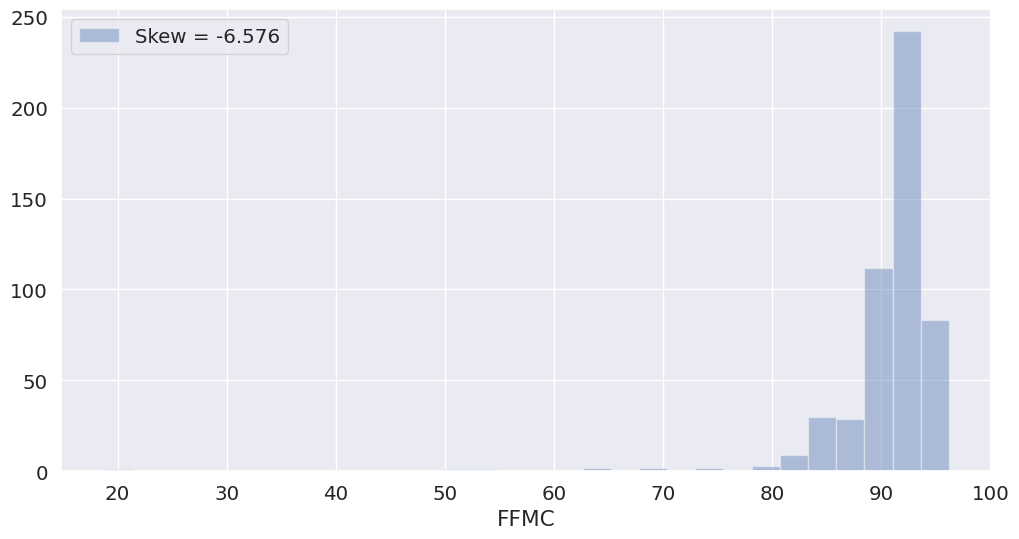

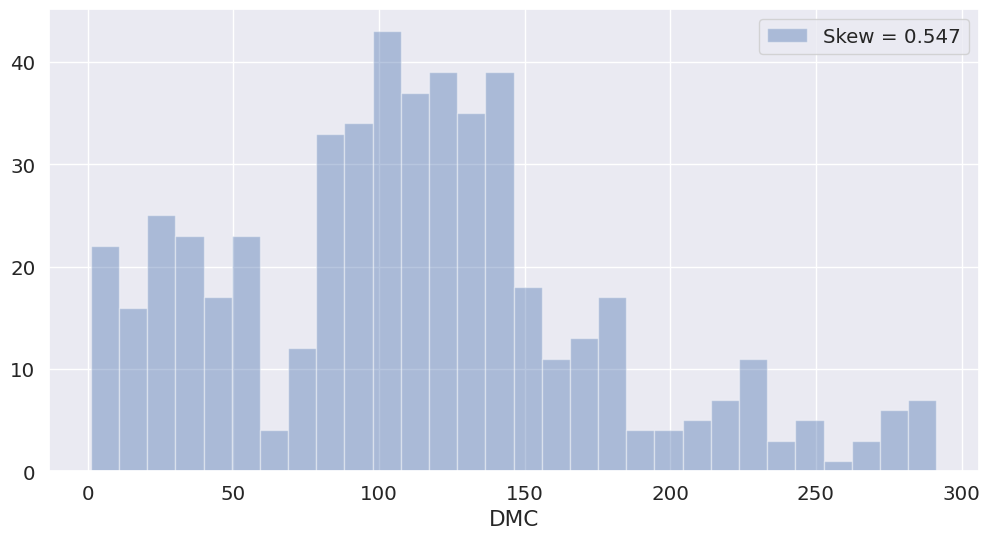

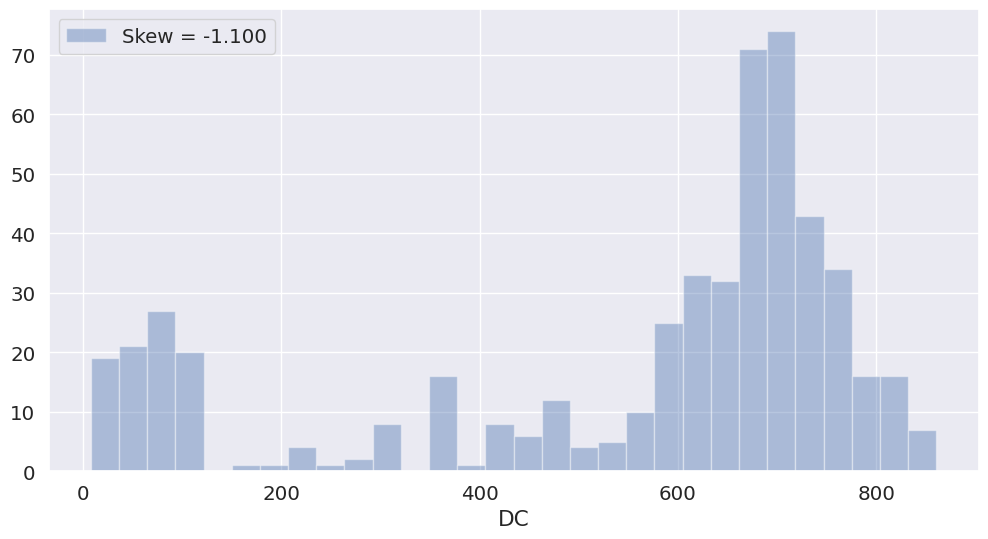

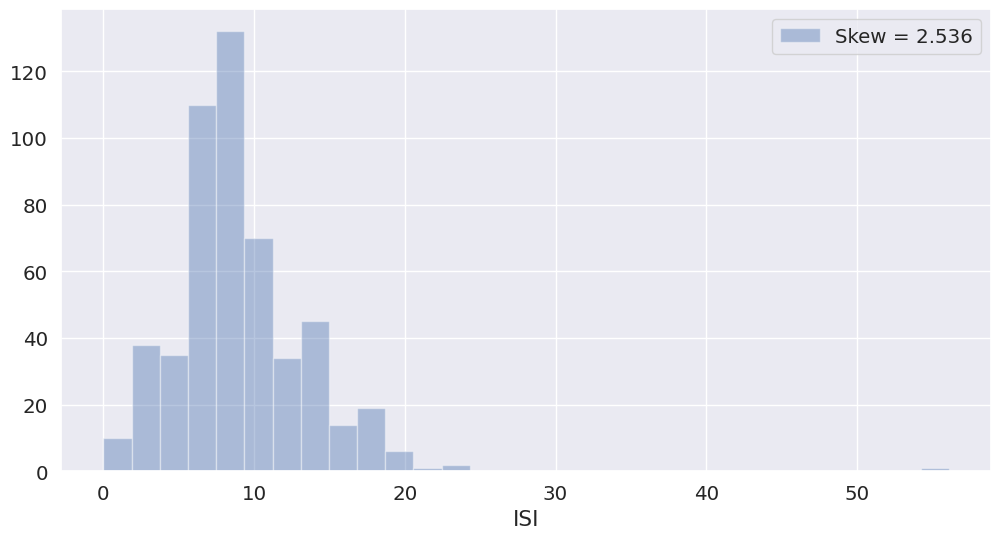

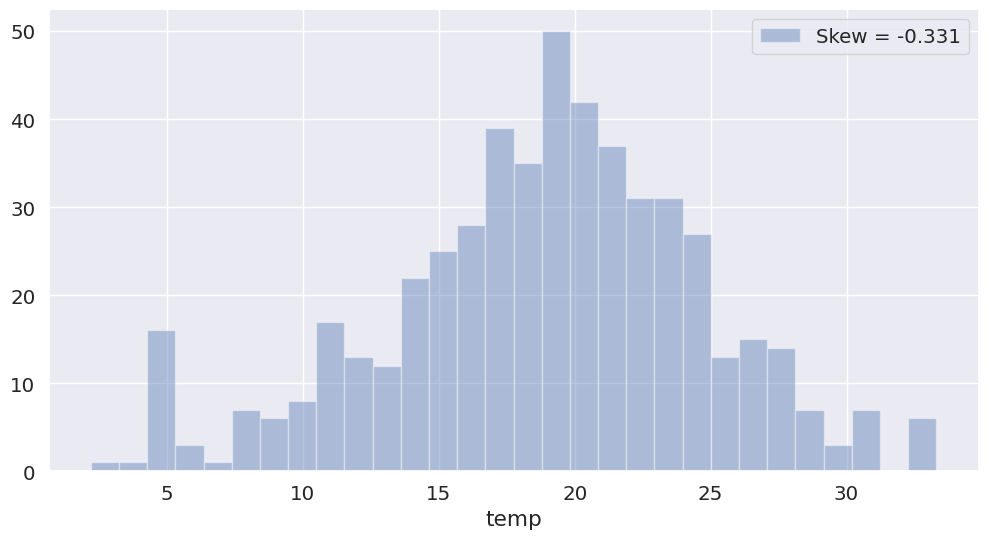

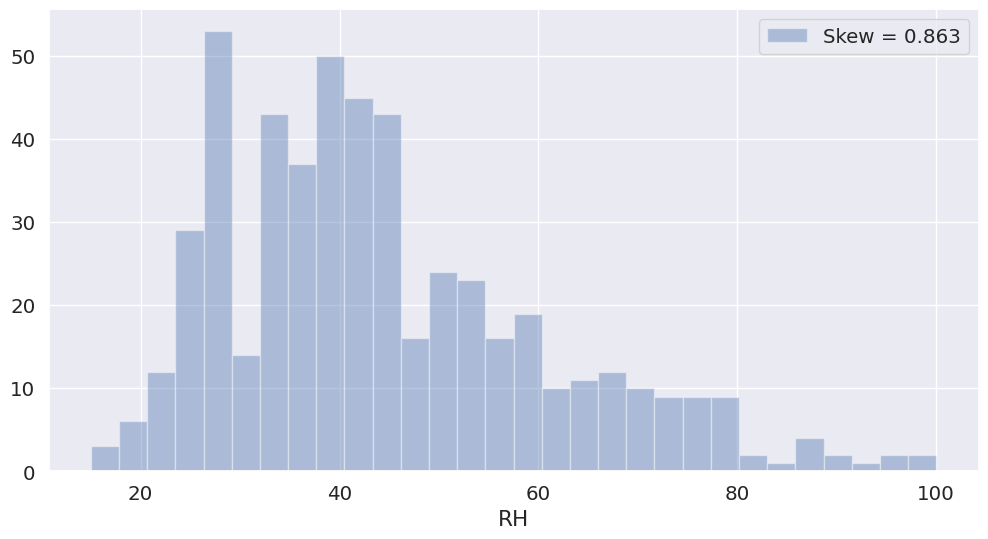

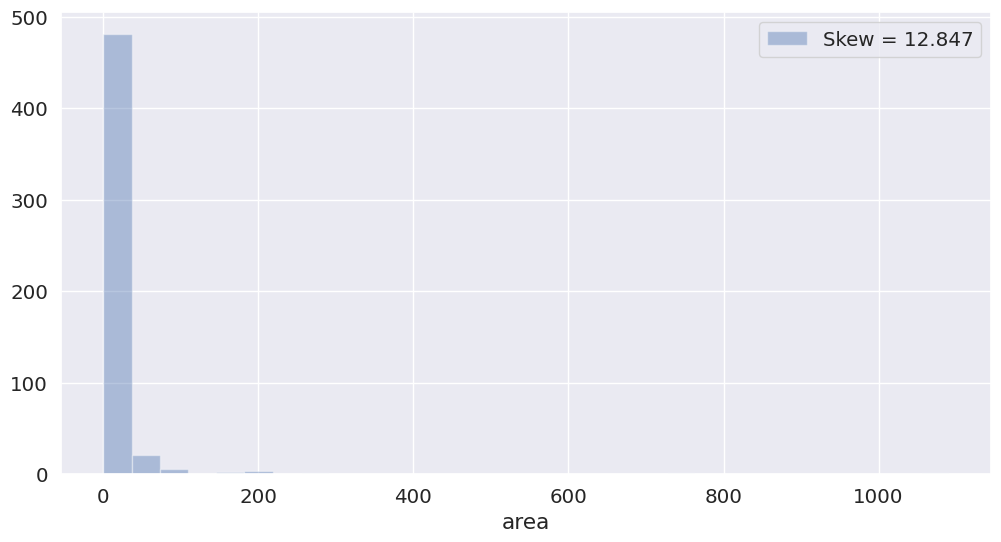

In [192]:
for feat in continuous_feature:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()